# Введение в искусственные нейронные сети
# Урок 1. Основы обучения нейронных сетей

## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

Выполнил __Соковнин И.Л.__

In [64]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Задача Ирисы-Фишера

__Ирисы Фишера__ — это набор данных для задачи классификации.

Применение классических методов для решения этой задачи подробно описано в книге В. П. Боровикова «Популярное введение в программу STATISTICA» («Компьютер–Пресс», 1998).

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor).

Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):
- Длина наружной доли околоцветника (англ. sepal length);
- Ширина наружной доли околоцветника (англ. sepal width);
- Длина внутренней доли околоцветника (англ. petal length);
- Ширина внутренней доли околоцветника (англ. petal width).

<!-- from IPython.display import Image
Image("iris_1.png") -->
<!-- <img src="iris_1.png",width=60,height=60> -->
![title](iris_1.png)

На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений.<br> Это задача многоклассовой классификации, так как имеется три класса — три вида ириса.

Один из классов (Iris setosa) линейно-разделим от двух остальных.<br>

1. https://ru.wikipedia.org/wiki/Ирисы_Фишера
2. Построение нейросети классификации Ирисов Фишера на базе JavaScript - http://www.habarov.spb.ru/lab_nnet/nn_js_lab/nn_js_iris.html

## Пример построения  двухслойной нейронной сети на numpy
Пример обратного распространения ошибки

In [31]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [32]:
### Шаг 1. Определение функций, которые понадобяться для обучения

# преобразование массива в бинарный вид результатов
# (перевод из label_incodihg в one_hot_incoding)
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
# (обратное превращение в lable_
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr


# сигмоида и ее производная
# вычисление логистической сигмоиды
def sigmoid(x):
    return 1/(1+np.exp(-x))

# вычисление производной от сигмоидной функции (логистической сигмоиды)
def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

# Задача Ирисы-Фишера

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
(150, 6)


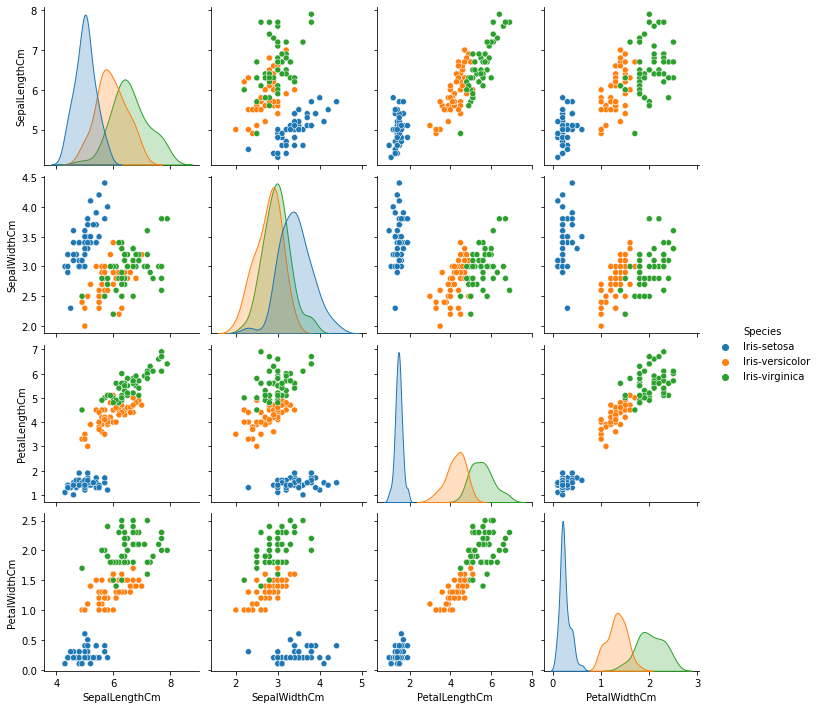

In [33]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("..\Iris.csv")
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных
print(iris_data.shape)

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
# x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
# y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [65]:
y
# Уникальные значения y:
# [1., 0., 0.]
# [0., 1., 0.]
# [0., 0., 1.]

# Решение задачи Ирисы-Фишера

# Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).

Макропараметры:
- количество эпох: ___epoch_numb___
- число нейронов скрытого слоя:  ___neuron_numb___
- количество скрытых слоёв (не используем)
- скорость обучения (learning rate, размер шага градиентного бустинга): ___learn_r___ or ___n___
- первоначальная (стартовая) точка: ___start_point = 1___?
- первоначальноя точность (критерия остановки): ___precision = 0.0001___?
- функция градиента

In [56]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя (ширина скрытого слоя)
neuron_numb = [5, 10, 15]
# neuron_numb = 5

# определим скорость обучения (learning rate)
# Скорость обучения является наиболее важным гиперпараметром для настройки нейронных сетей. 
# Желательная скорость обучения достаточно низкая, чтобы сеть сходилась к чему-то полезному, 
# но достаточно высокая, чтобы ее можно было обучить за разумное время.
n = [0.005, 0.05, 0.5, 1.0, 5.0]
# n = 0.05

# определим количество эпох
epoch_numb = [100, 1000, 10000]

In [57]:
# инициализируем начальные веса
def random_weights(neuron_numb):
    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 5 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
    
    return w0, w1

In [58]:
def fit_nn(neuron_numb, n, epoch_numb):
    # процесс обучения
    # neuron_numb - число нейронов скрытого слоя    
    # n - скорость обучения
    
    # массив для ошибок, чтобы потом построить график
    errors = []

    # инициализируем начальные веса
    w0, w1 = random_weights(neuron_numb)
    
    for i in range(epoch_numb):  # Входной параметр - количество эпох
        # Эпохой при обучении нейронной сети называется
        # результат обучения после предьявления всех примеров один раз

        # прямое распространение(feed forward)
        layer0 = X_train  # входной набор данных
        layer1 = sigmoid(np.dot(layer0, w0))  # свёртка с весами - 5 ответов для каждого из 100 примеров (скрытый слой)
        layer2 = sigmoid(np.dot(layer1, w1))  # ответ модели - выходной слой (5x3) получаем Nx3 (N=100 кол-во эпох?)

        # невязка - производная наших квадратичных потерь?

        # обратное распространение(back propagation) с использованием градиентного спуска
        # layer2_error - ошибка выходного слоя
        layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)  # sigmoid_deriv(layer2) - производная сигмоида по его выходу
        # layer2_delta учавствует и в коррекции и в обратном распространении

        # определяем производную потерь на слое 1
        layer1_error = layer2_delta.dot(w1.T)  # w1 - настраиваемые параметры (формула 18.3)
        # layer1_error - ошибка скрытого слоя (слой 1)
        # sigmoid_deriv(layer1) - производная активационно функции по входу скрытому слою
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        # коррекция
        # вычисляем шаг коррекции
        w1 += layer1.T.dot(layer2_delta) * n  # вход соответствующего нейрона (формула 17.6)
        w0 += layer0.T.dot(layer1_delta) * n  # n - скорость обучения

        # метрика модели
        # потери нашихмоделей на обучении
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100  # это не accuracy, оно считается по другому
    
    return errors, layer2, accuracy, w0, w1

def plot_errors(errors, i, j, k):
    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения
    plt.figure(figsize = (16,5))
    plt.suptitle("ширина слоя = " + str(i) + ", скорость обучения = " + str(j) + ", количество эпох = "  + str(k))
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show() # расскоментируйте, чтобы посмотреть 

def plot_layer_y(layer, accuracy, y, label, i, j, k):
    N = 50
    plt.figure(figsize = (16,5))
    plt.plot(layer[:N,1], 'r',label = 'Y new')
    plt.plot(y[:N,1],'g', label = label)
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.show() # расскоментируйте, чтобы посмотреть 
    if label == 'Y_train':
        plt.suptitle("ширина слоя = " + str(i) + ", скорость обучения = " + str(j) + ", количество эпох = "  + str(k))
        print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")
    elif label == 'Y_test':
        print("Аккуратность нейронной сети на тесте " + str(round(accuracy,2)) + "%")

In [60]:
def predict_nn(X_test, y_test, w0, w1):
    # прямое распространение(feed forward) на тестовом множестве
    
    layer0_t = X_test
    layer1_t = sigmoid(np.dot(layer0_t, w0))
    layer2_t = sigmoid(np.dot(layer1_t, w1))
    layer2_error_t = y_test - layer2_t

    # метрика модели
    error_t = np.mean(np.abs(layer2_error_t))
    accuracy_t = (1 - error_t) * 100

    plot_layer_y(layer2_t, accuracy_t, y_test, 'Y_test',i , j, k)
    # print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")
    
    return accuracy_t

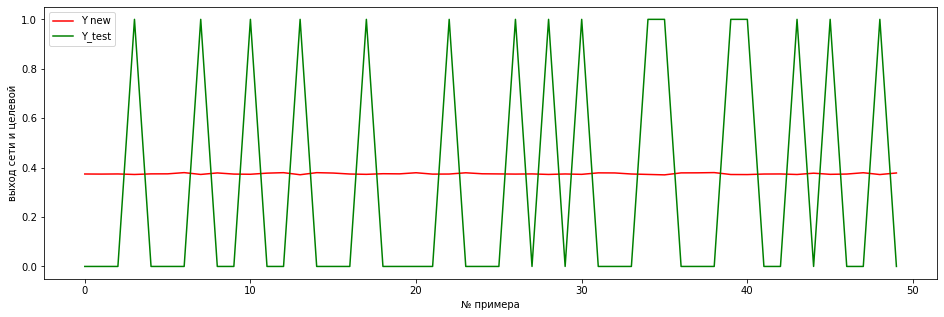

Аккуратность нейронной сети на тесте 55.89%

Набор параметров 0:
- ширина слоя = 5,
- скорость обучения = 0.005,
- количество эпох = 100


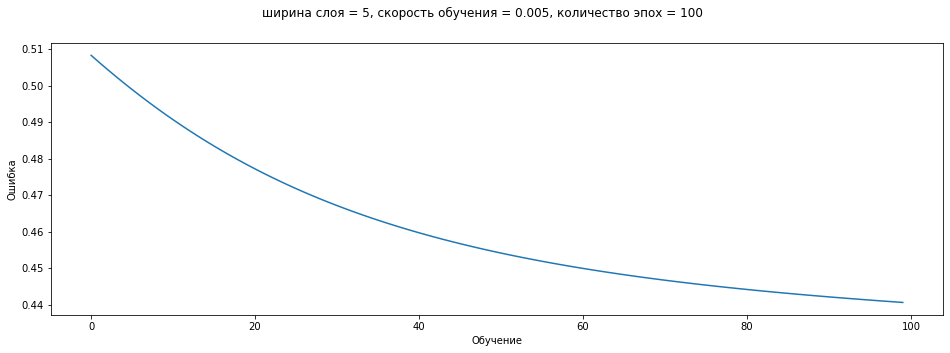

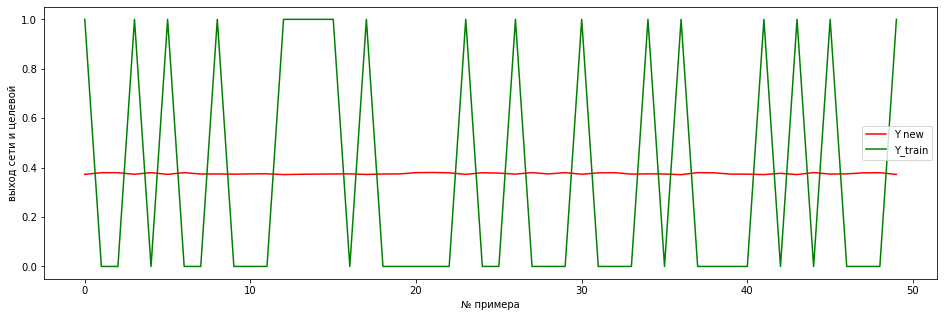

Аккуратность нейронной сети 55.94%


<Figure size 432x288 with 0 Axes>

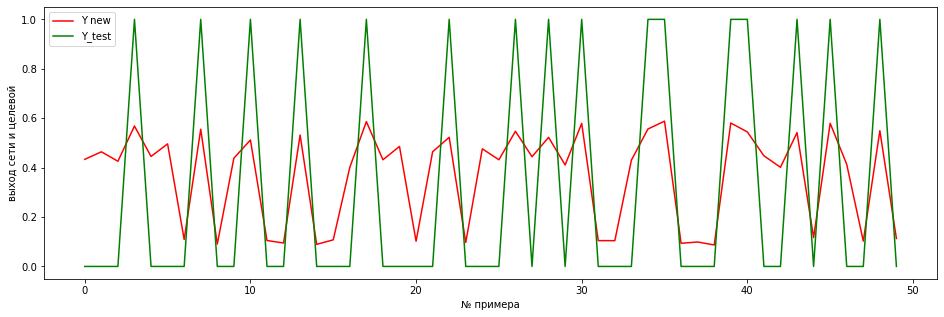

Аккуратность нейронной сети на тесте 69.09%

Набор параметров 1:
- ширина слоя = 5,
- скорость обучения = 0.005,
- количество эпох = 1000


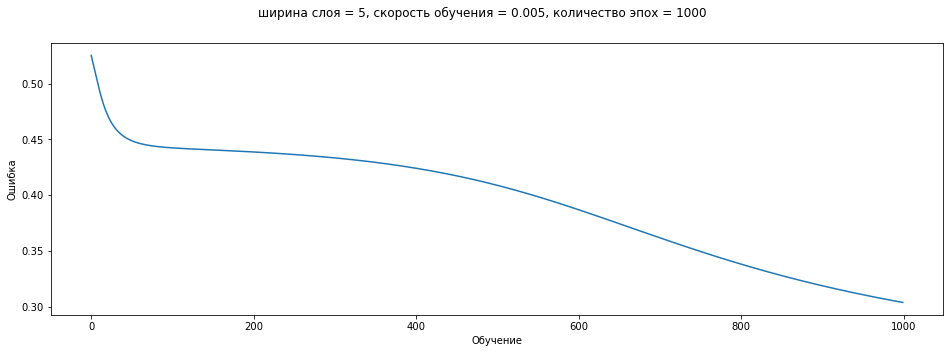

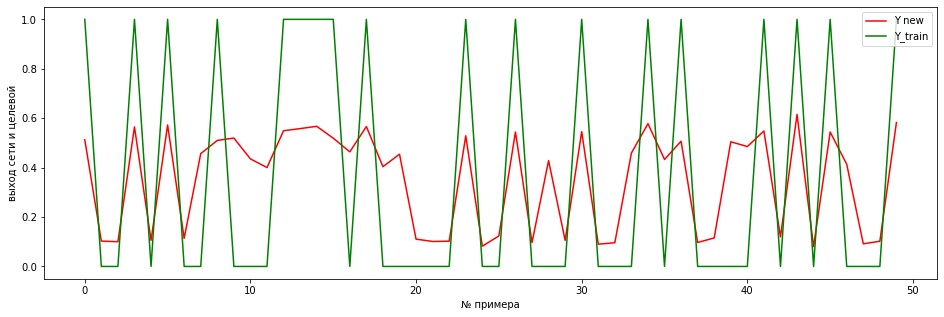

Аккуратность нейронной сети 69.61%


<Figure size 432x288 with 0 Axes>

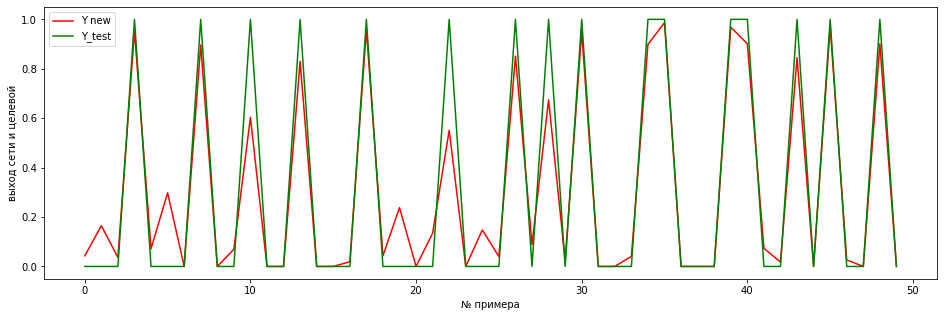

Аккуратность нейронной сети на тесте 91.1%

Набор параметров 2:
- ширина слоя = 5,
- скорость обучения = 0.005,
- количество эпох = 10000


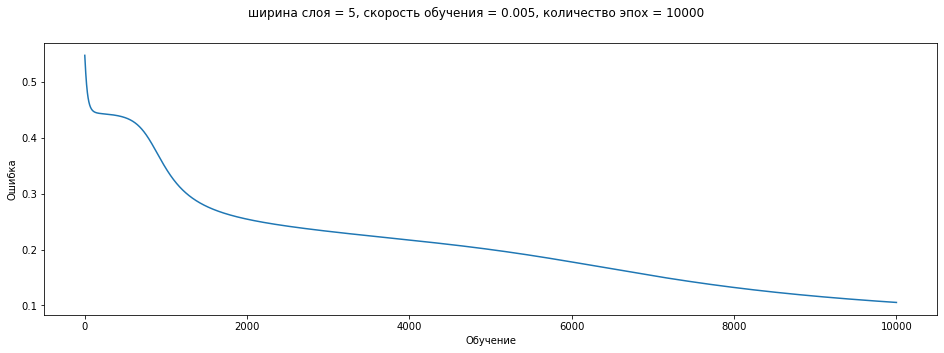

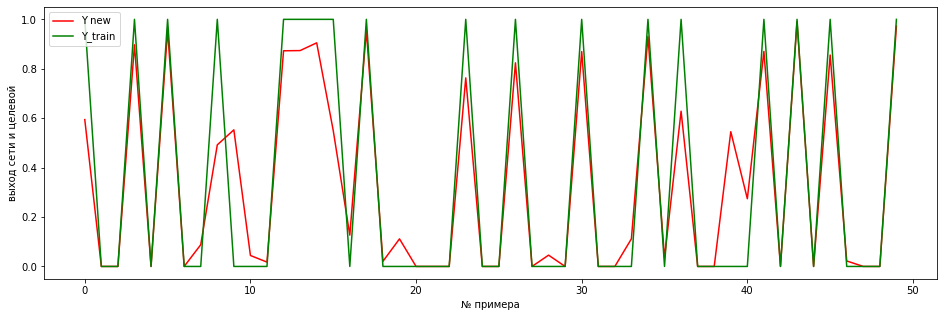

Аккуратность нейронной сети 89.48%


<Figure size 432x288 with 0 Axes>

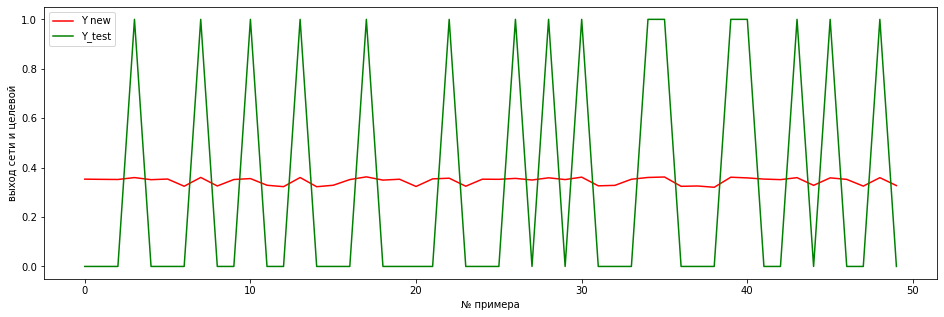

Аккуратность нейронной сети на тесте 56.24%

Набор параметров 3:
- ширина слоя = 10,
- скорость обучения = 0.005,
- количество эпох = 100


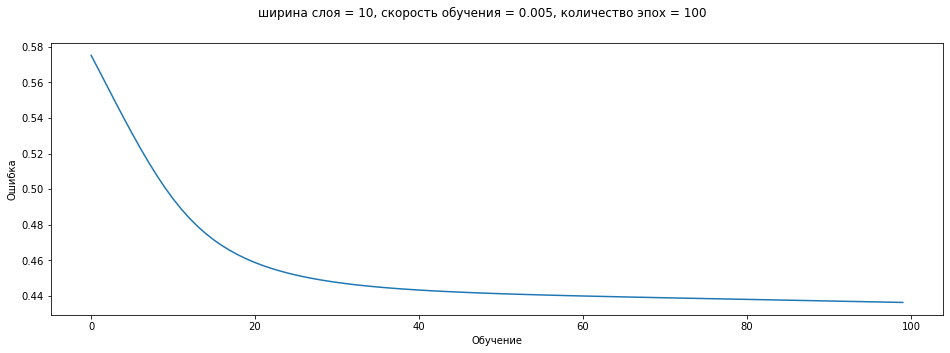

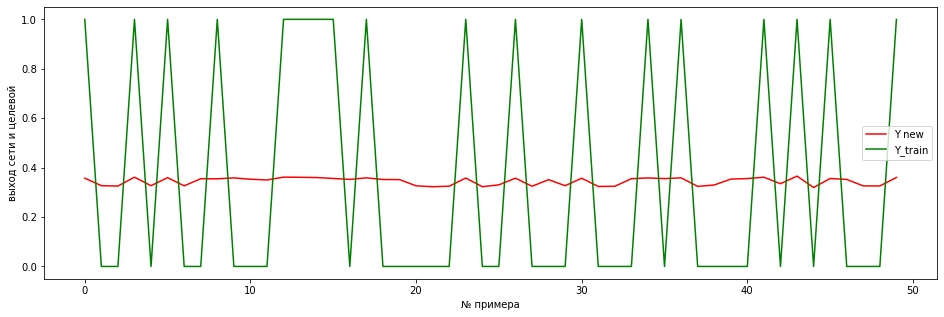

Аккуратность нейронной сети 56.36%


<Figure size 432x288 with 0 Axes>

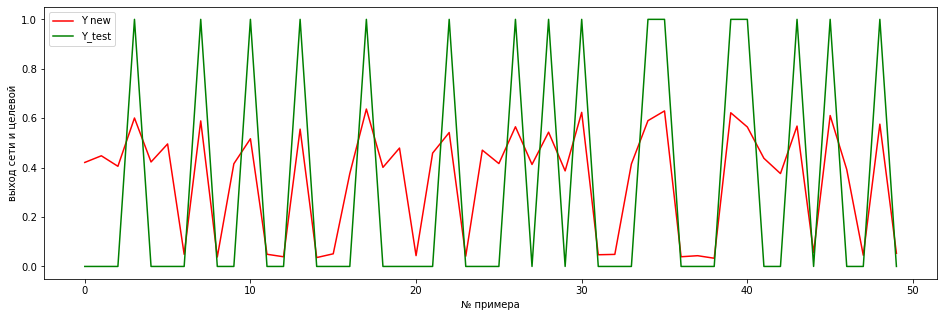

Аккуратность нейронной сети на тесте 72.48%

Набор параметров 4:
- ширина слоя = 10,
- скорость обучения = 0.005,
- количество эпох = 1000


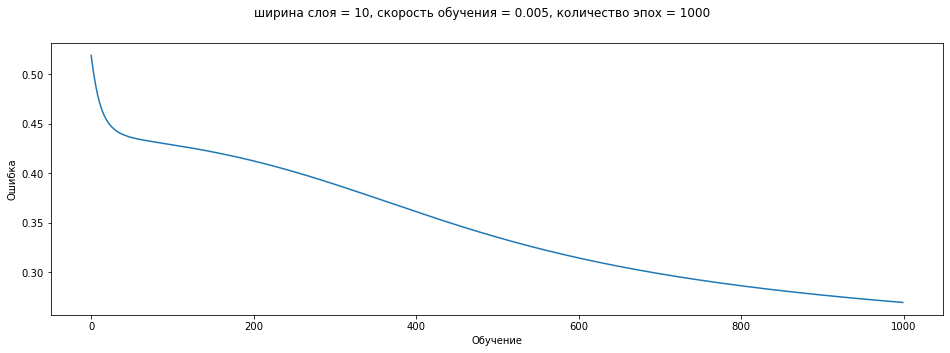

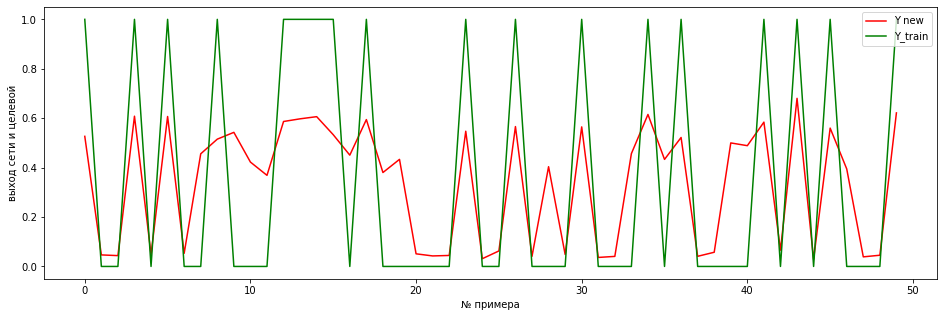

Аккуратность нейронной сети 73.04%


<Figure size 432x288 with 0 Axes>

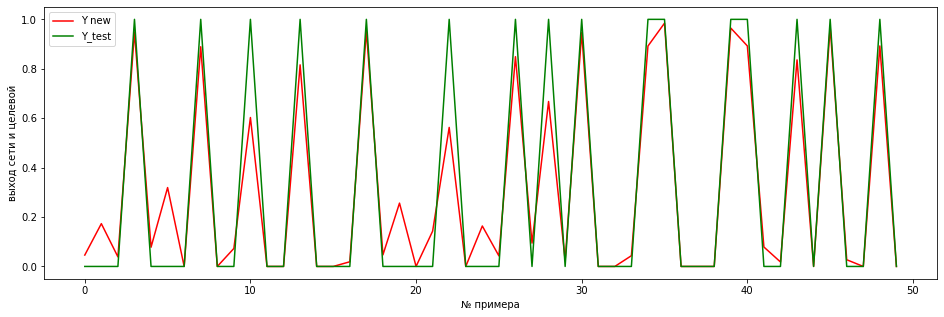

Аккуратность нейронной сети на тесте 91.64%

Набор параметров 5:
- ширина слоя = 10,
- скорость обучения = 0.005,
- количество эпох = 10000


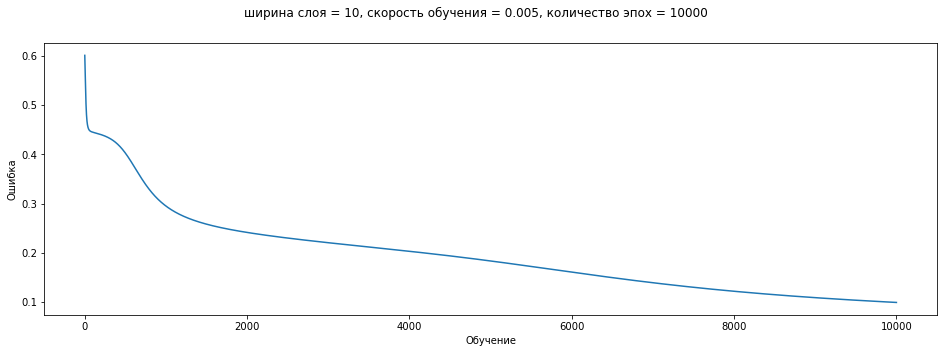

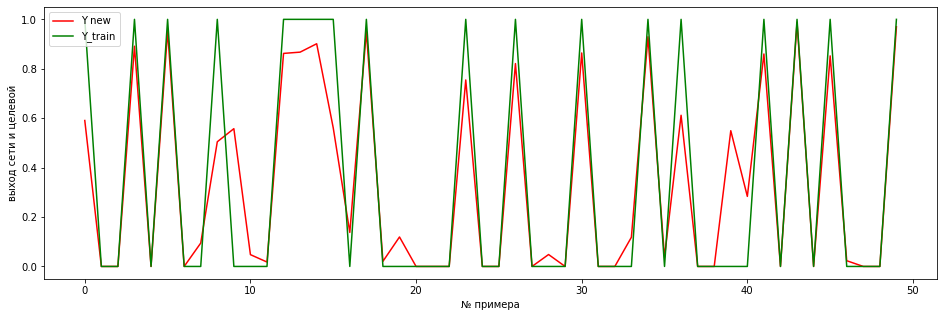

Аккуратность нейронной сети 90.1%


<Figure size 432x288 with 0 Axes>

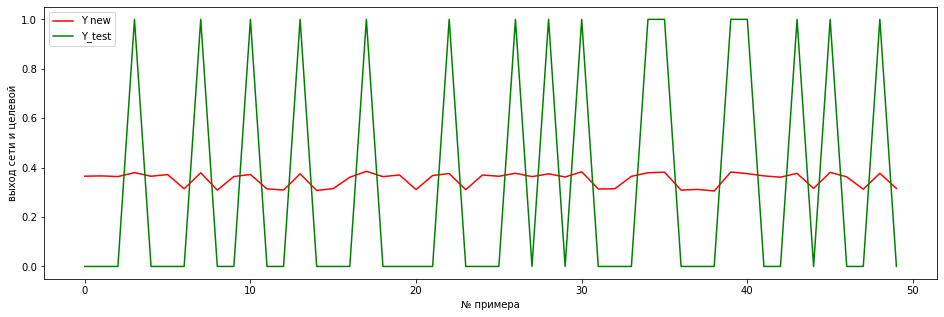

Аккуратность нейронной сети на тесте 56.48%

Набор параметров 6:
- ширина слоя = 15,
- скорость обучения = 0.005,
- количество эпох = 100


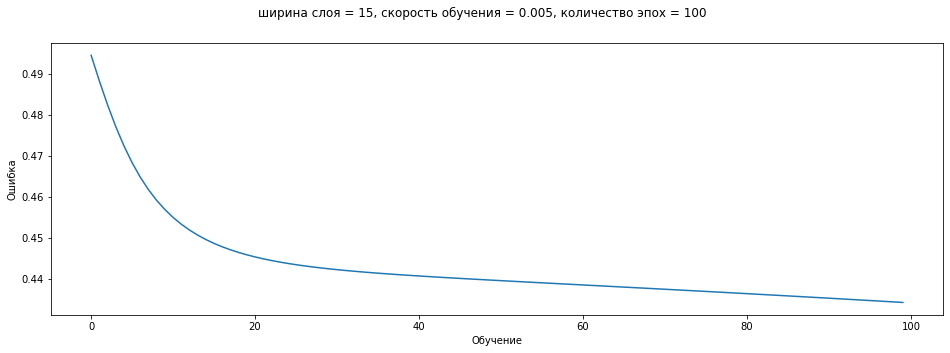

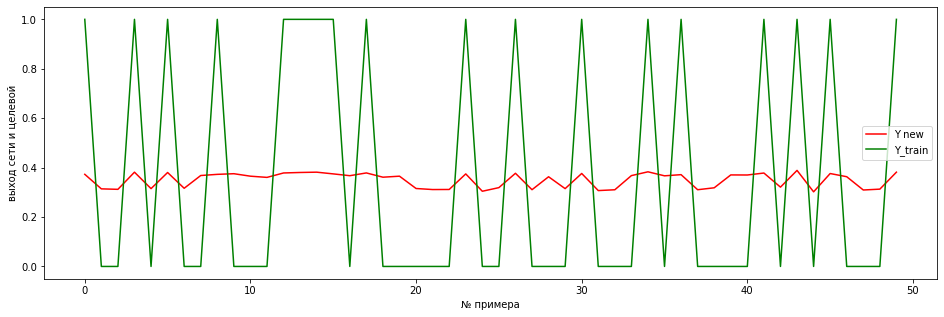

Аккуратность нейронной сети 56.58%


<Figure size 432x288 with 0 Axes>

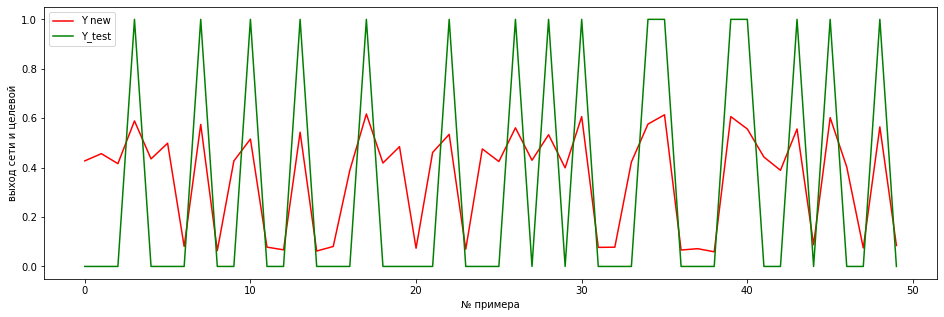

Аккуратность нейронной сети на тесте 71.19%

Набор параметров 7:
- ширина слоя = 15,
- скорость обучения = 0.005,
- количество эпох = 1000


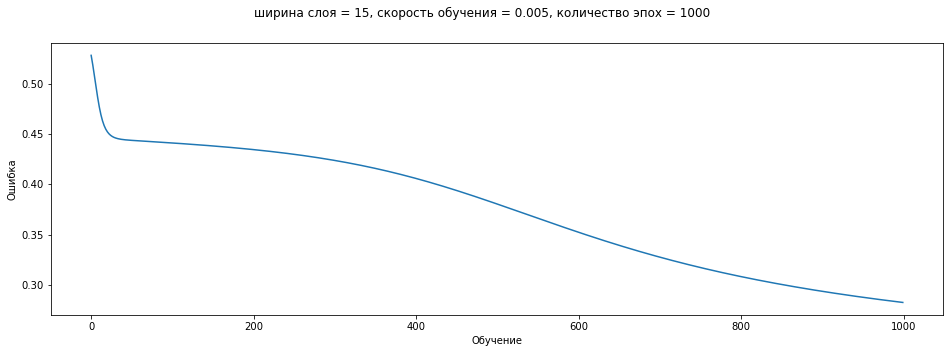

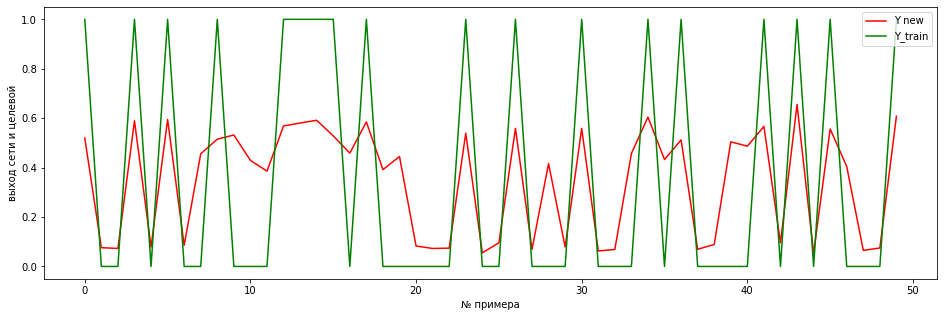

Аккуратность нейронной сети 71.76%


<Figure size 432x288 with 0 Axes>

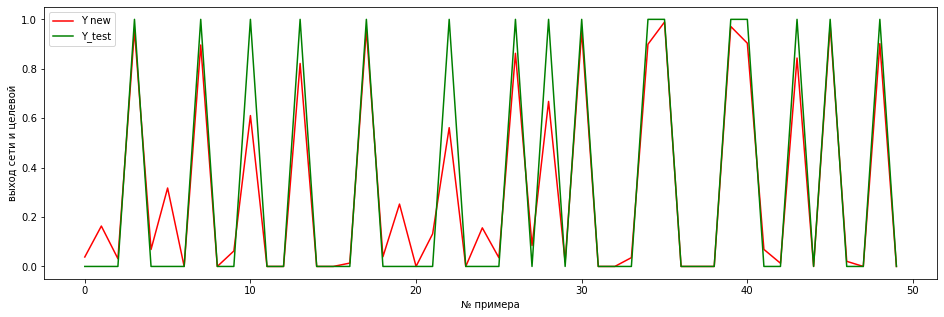

Аккуратность нейронной сети на тесте 91.43%

Набор параметров 8:
- ширина слоя = 15,
- скорость обучения = 0.005,
- количество эпох = 10000


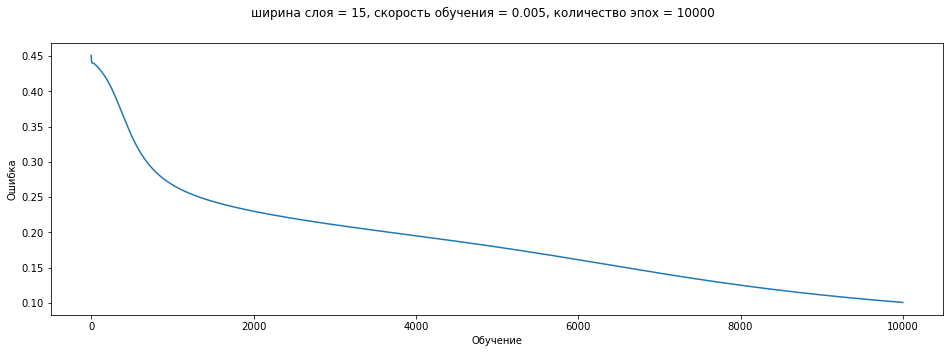

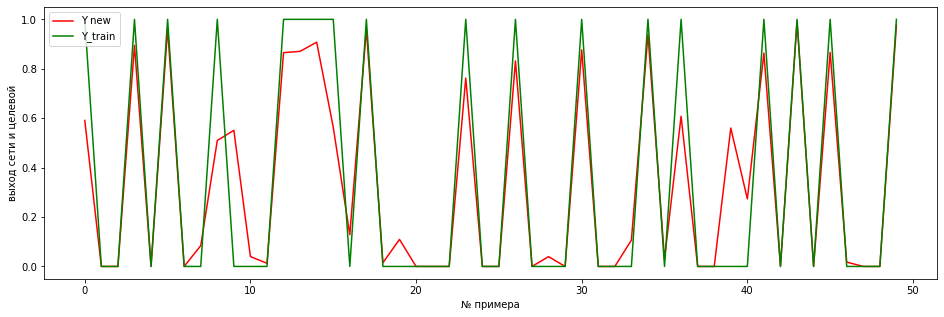

Аккуратность нейронной сети 89.95%


<Figure size 432x288 with 0 Axes>

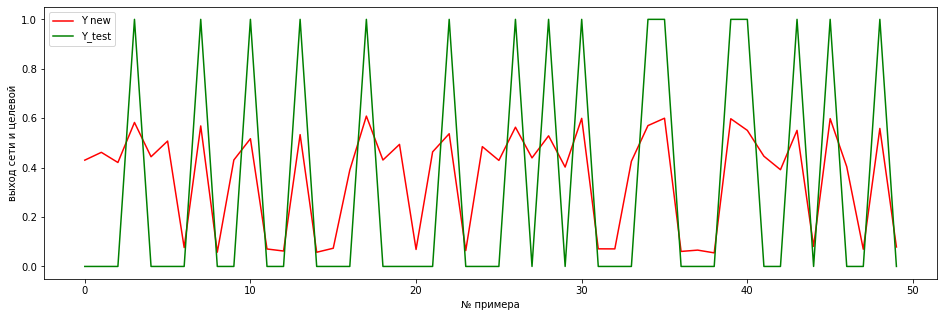

Аккуратность нейронной сети на тесте 70.54%

Набор параметров 9:
- ширина слоя = 5,
- скорость обучения = 0.05,
- количество эпох = 100


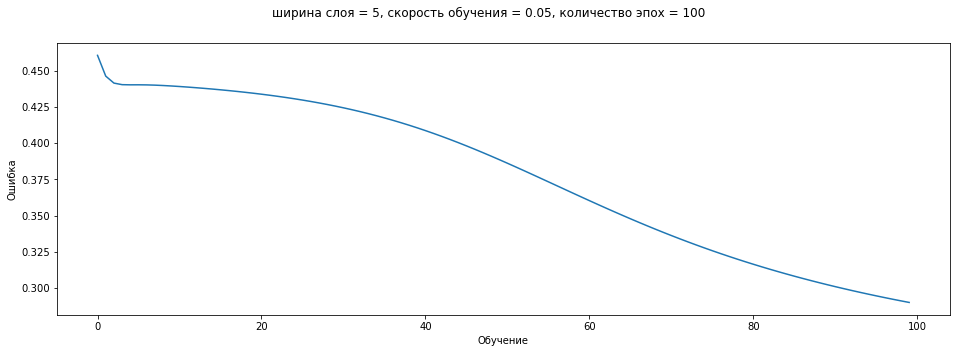

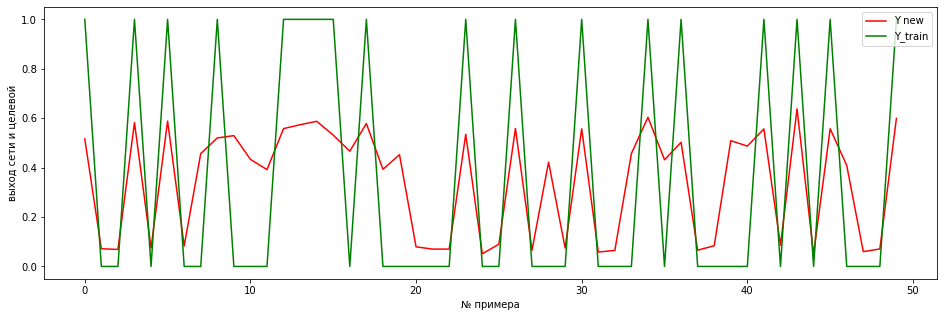

Аккуратность нейронной сети 70.99%


<Figure size 432x288 with 0 Axes>

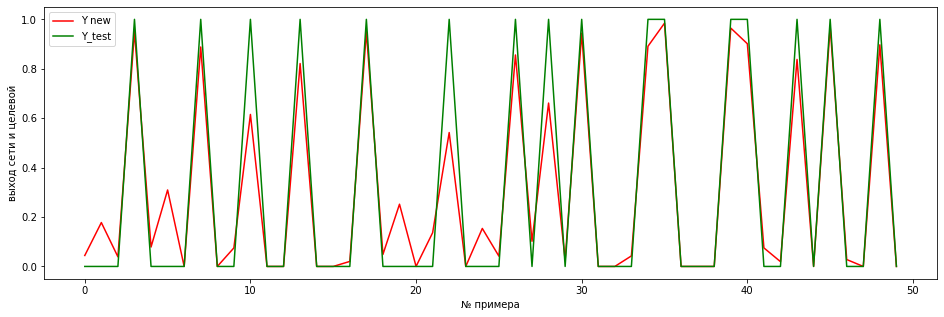

Аккуратность нейронной сети на тесте 90.59%

Набор параметров 10:
- ширина слоя = 5,
- скорость обучения = 0.05,
- количество эпох = 1000


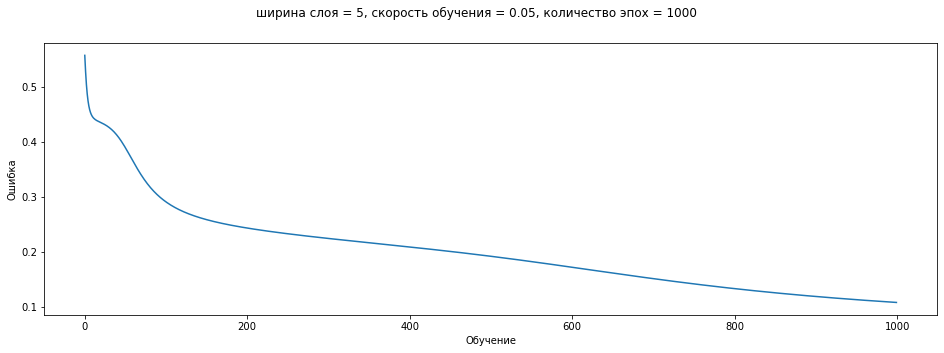

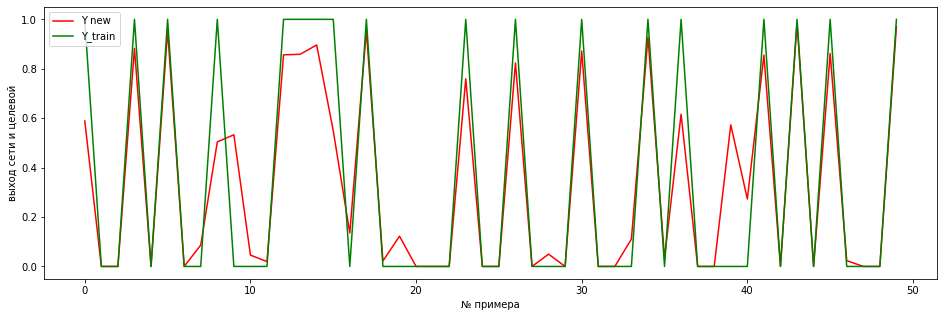

Аккуратность нейронной сети 89.19%


<Figure size 432x288 with 0 Axes>

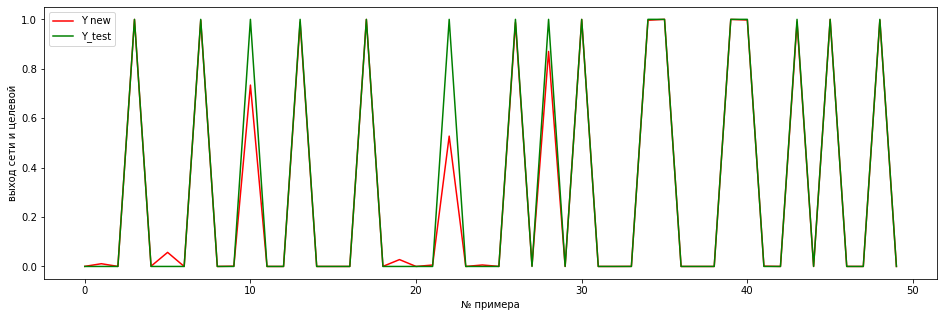

Аккуратность нейронной сети на тесте 98.33%

Набор параметров 11:
- ширина слоя = 5,
- скорость обучения = 0.05,
- количество эпох = 10000


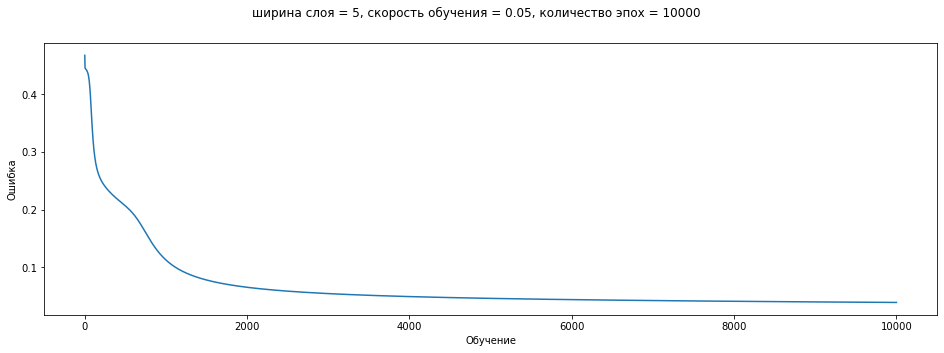

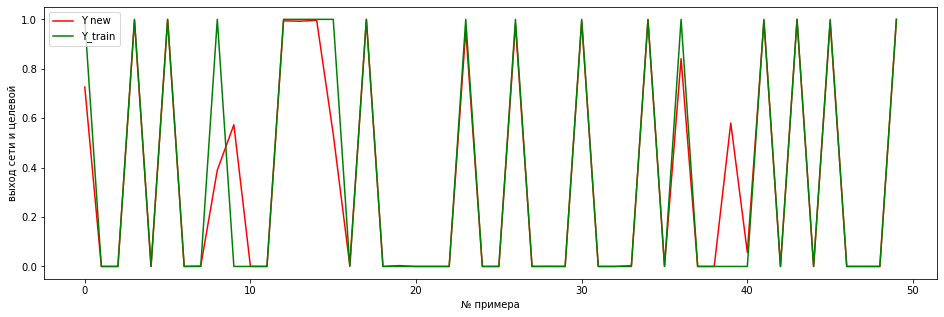

Аккуратность нейронной сети 96.08%


<Figure size 432x288 with 0 Axes>

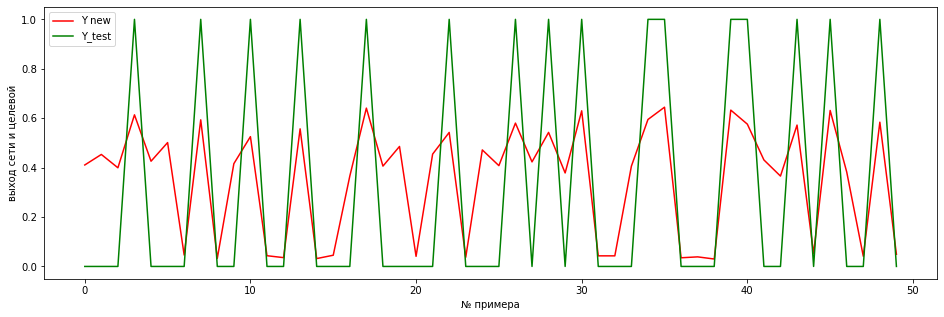

Аккуратность нейронной сети на тесте 72.1%

Набор параметров 12:
- ширина слоя = 10,
- скорость обучения = 0.05,
- количество эпох = 100


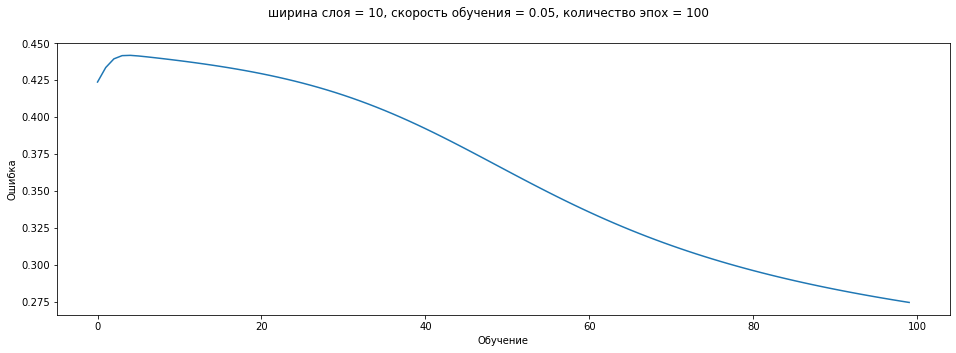

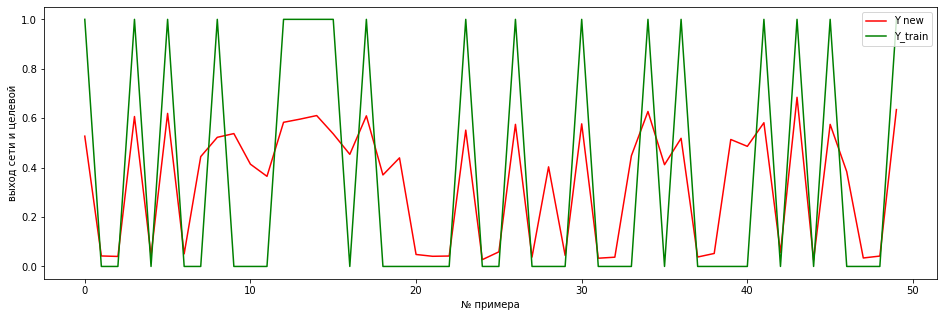

Аккуратность нейронной сети 72.56%


<Figure size 432x288 with 0 Axes>

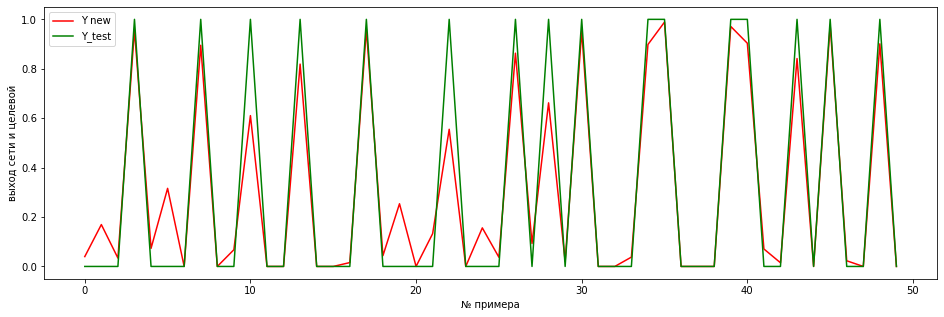

Аккуратность нейронной сети на тесте 91.41%

Набор параметров 13:
- ширина слоя = 10,
- скорость обучения = 0.05,
- количество эпох = 1000


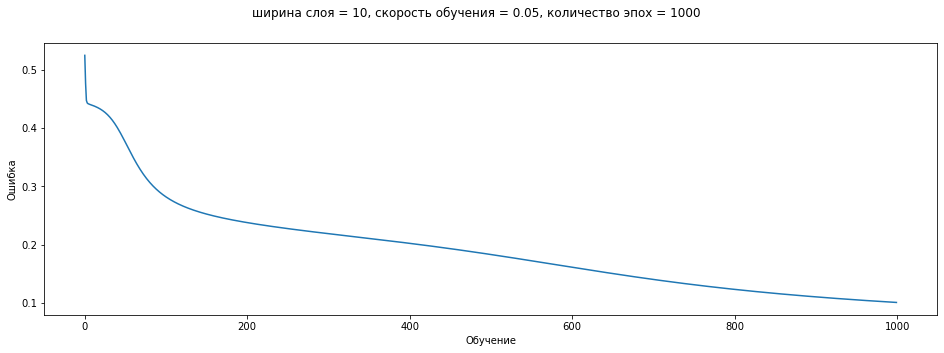

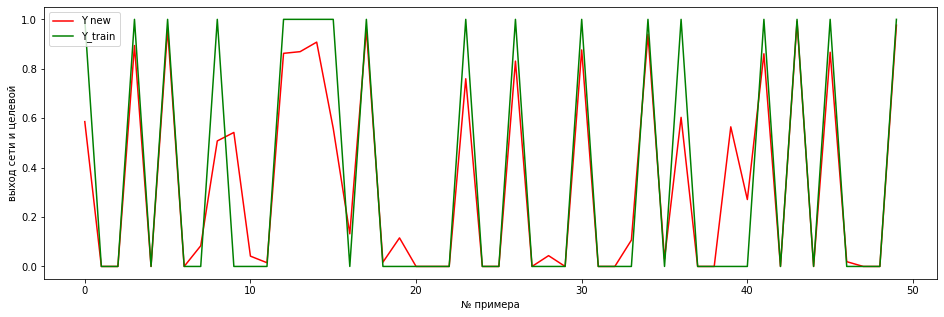

Аккуратность нейронной сети 89.89%


<Figure size 432x288 with 0 Axes>

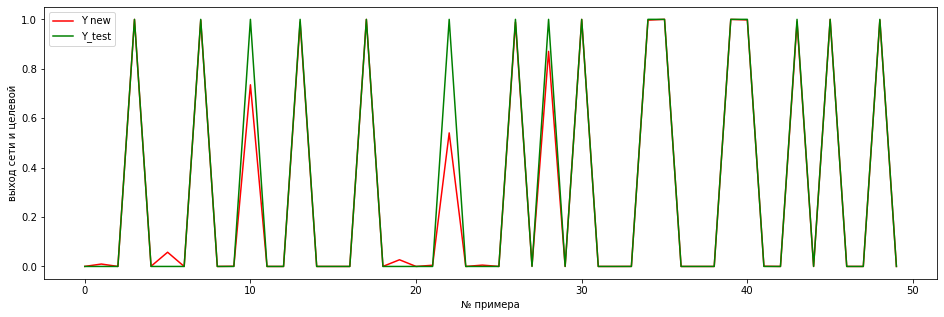

Аккуратность нейронной сети на тесте 98.35%

Набор параметров 14:
- ширина слоя = 10,
- скорость обучения = 0.05,
- количество эпох = 10000


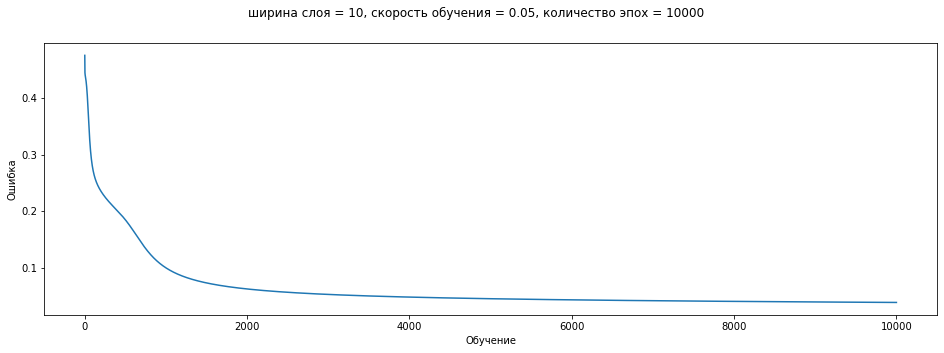

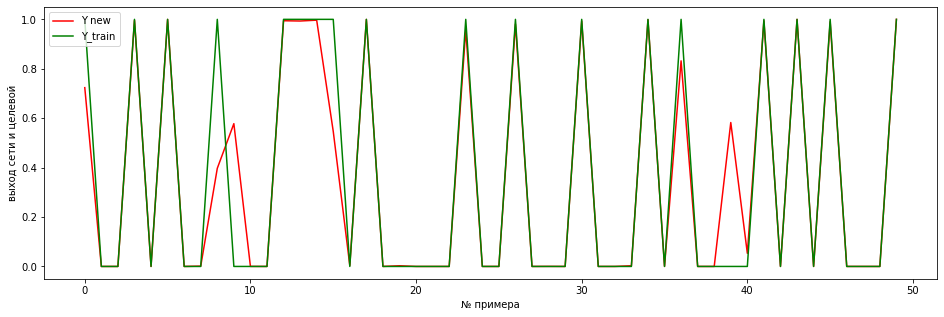

Аккуратность нейронной сети 96.11%


<Figure size 432x288 with 0 Axes>

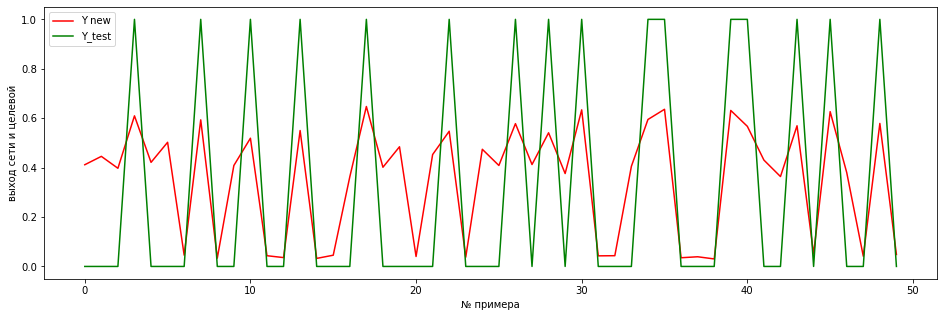

Аккуратность нейронной сети на тесте 72.89%

Набор параметров 15:
- ширина слоя = 15,
- скорость обучения = 0.05,
- количество эпох = 100


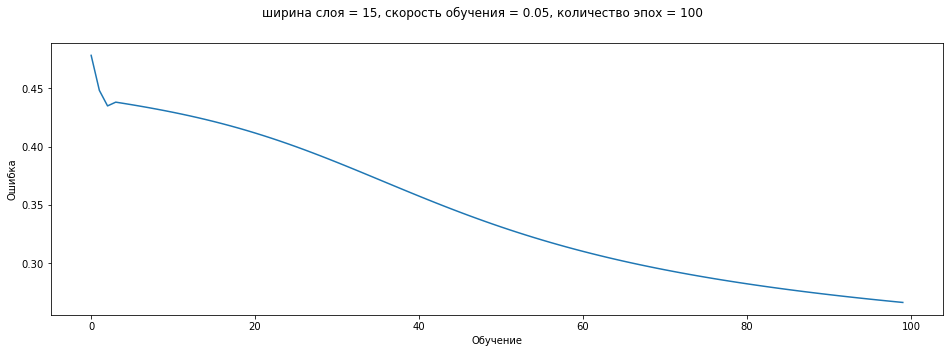

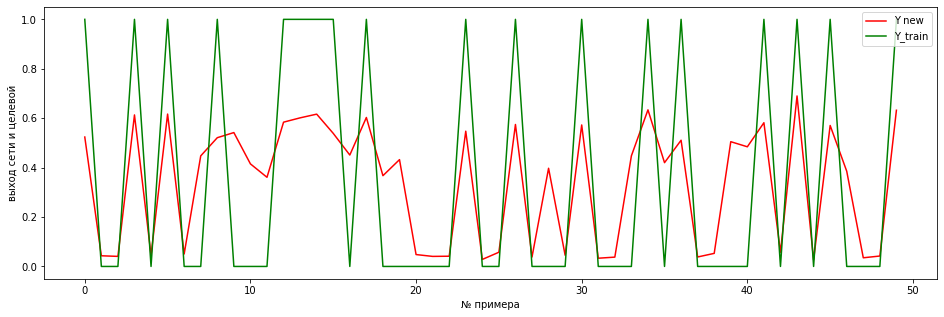

Аккуратность нейронной сети 73.34%


<Figure size 432x288 with 0 Axes>

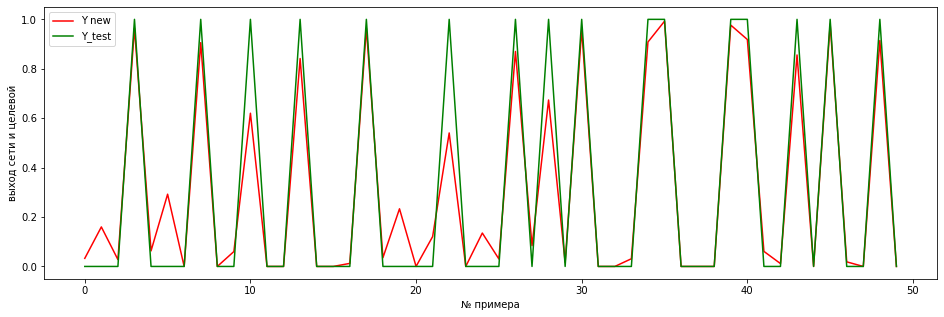

Аккуратность нейронной сети на тесте 91.85%

Набор параметров 16:
- ширина слоя = 15,
- скорость обучения = 0.05,
- количество эпох = 1000


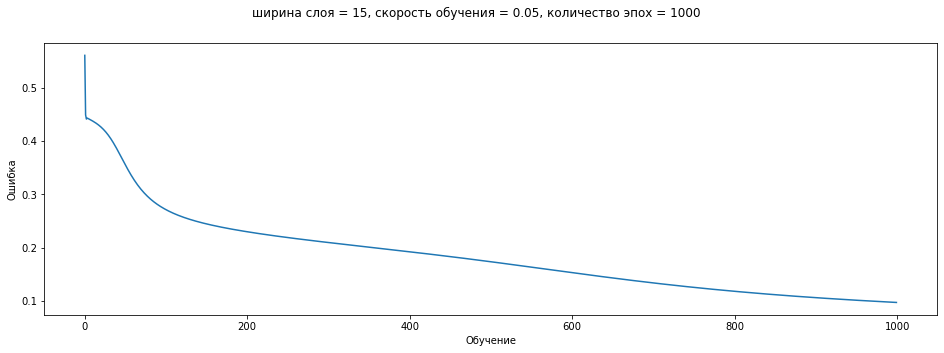

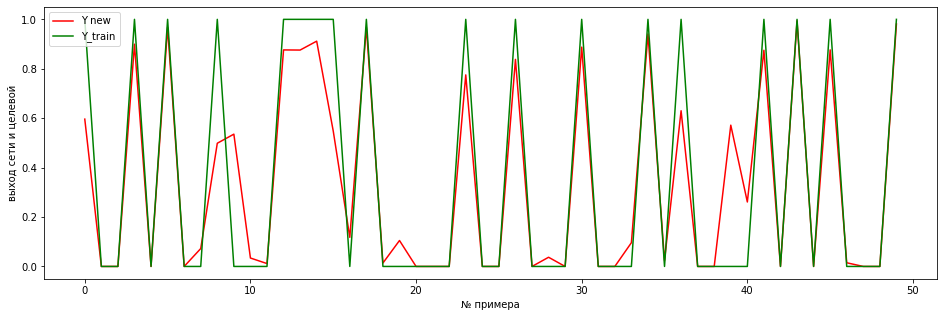

Аккуратность нейронной сети 90.29%


<Figure size 432x288 with 0 Axes>

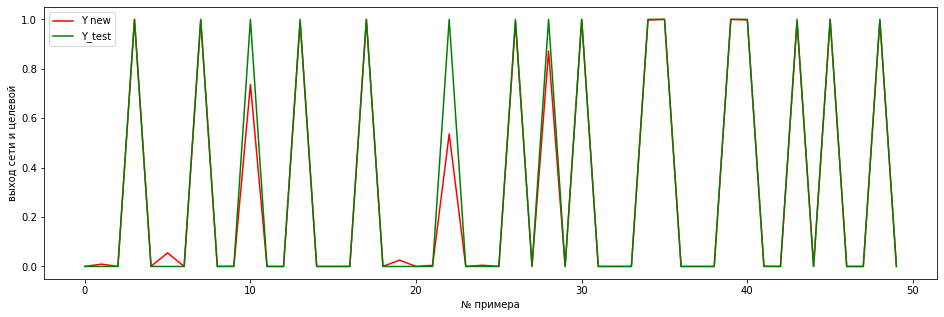

Аккуратность нейронной сети на тесте 98.34%

Набор параметров 17:
- ширина слоя = 15,
- скорость обучения = 0.05,
- количество эпох = 10000


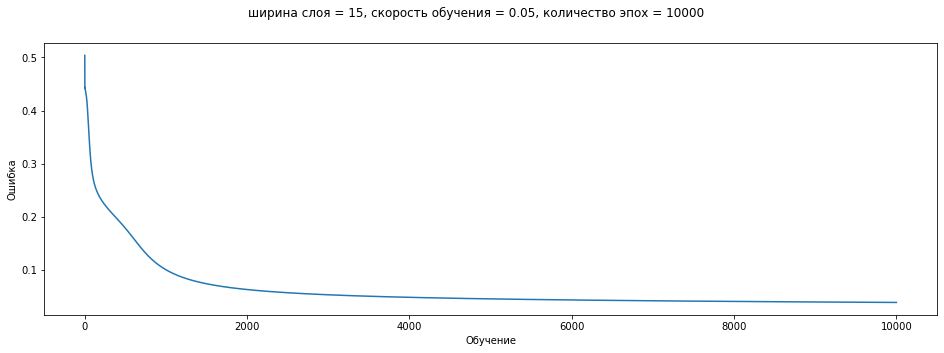

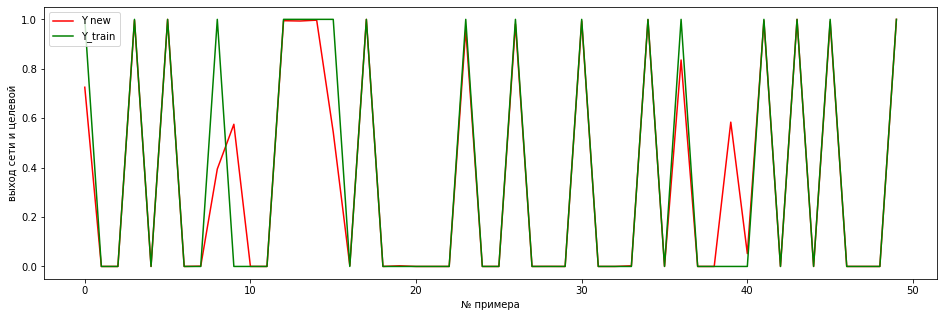

Аккуратность нейронной сети 96.1%


<Figure size 432x288 with 0 Axes>

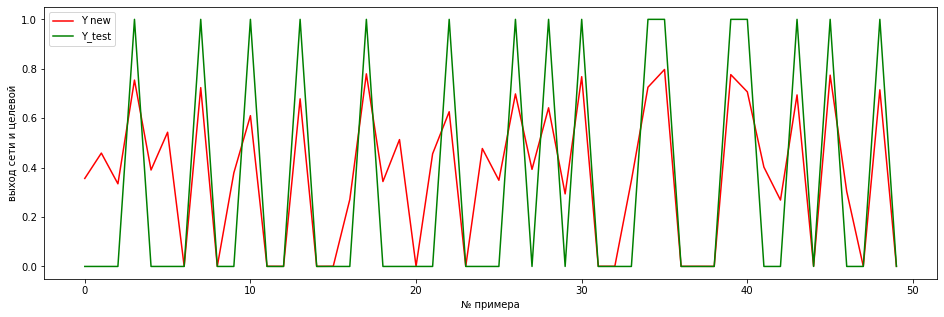

Аккуратность нейронной сети на тесте 81.11%

Набор параметров 18:
- ширина слоя = 5,
- скорость обучения = 0.5,
- количество эпох = 100


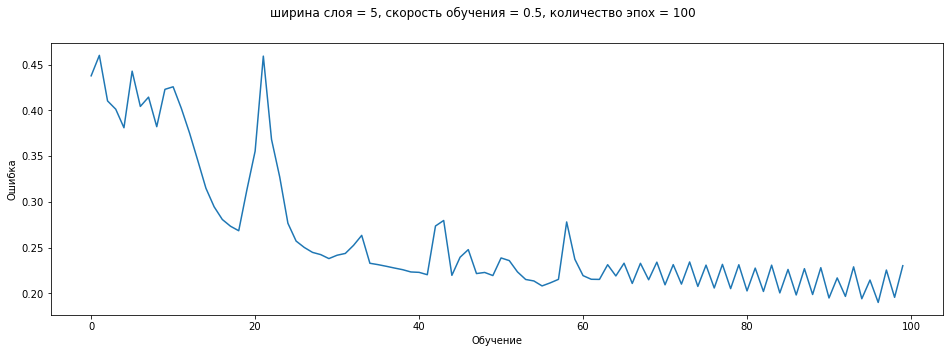

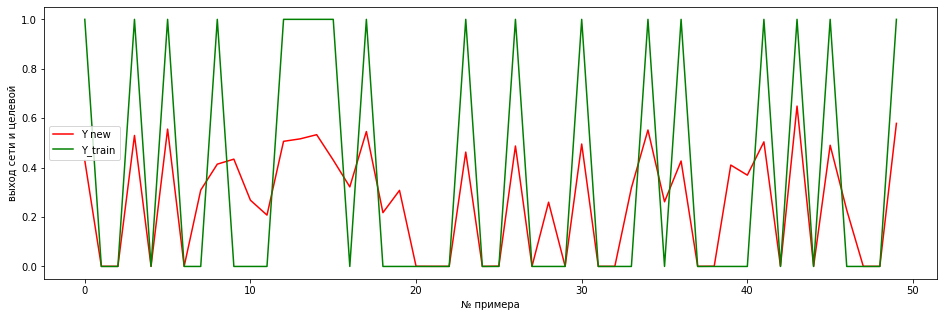

Аккуратность нейронной сети 76.97%


<Figure size 432x288 with 0 Axes>

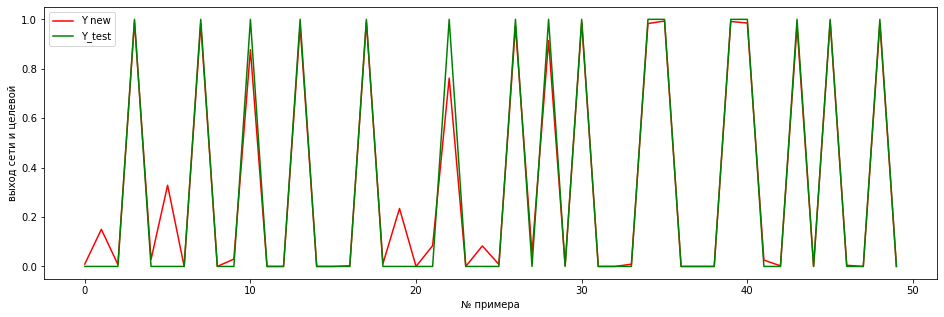

Аккуратность нейронной сети на тесте 97.18%

Набор параметров 19:
- ширина слоя = 5,
- скорость обучения = 0.5,
- количество эпох = 1000


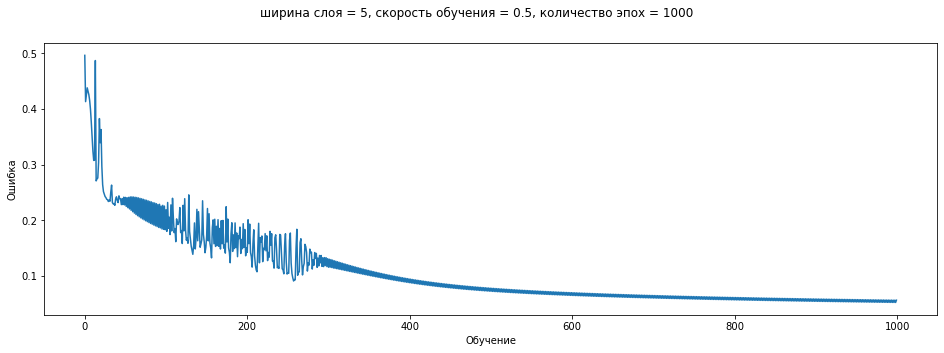

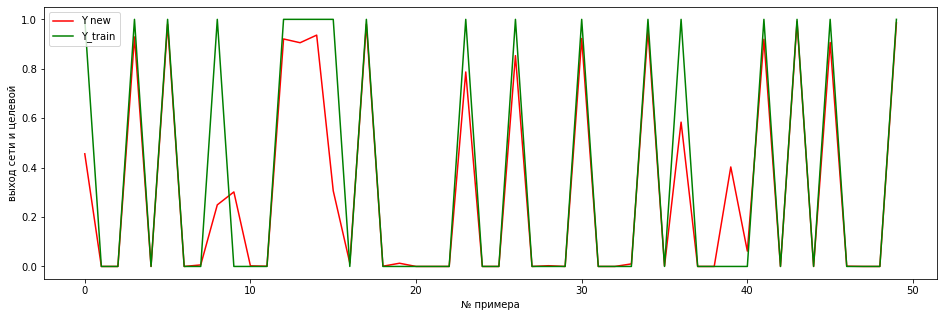

Аккуратность нейронной сети 94.33%


<Figure size 432x288 with 0 Axes>

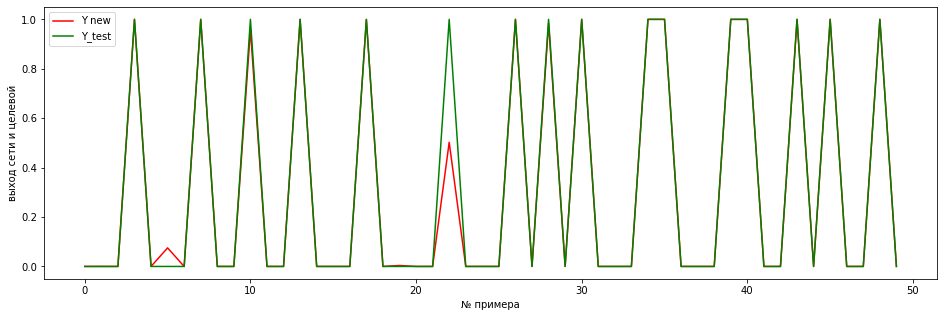

Аккуратность нейронной сети на тесте 99.04%

Набор параметров 20:
- ширина слоя = 5,
- скорость обучения = 0.5,
- количество эпох = 10000


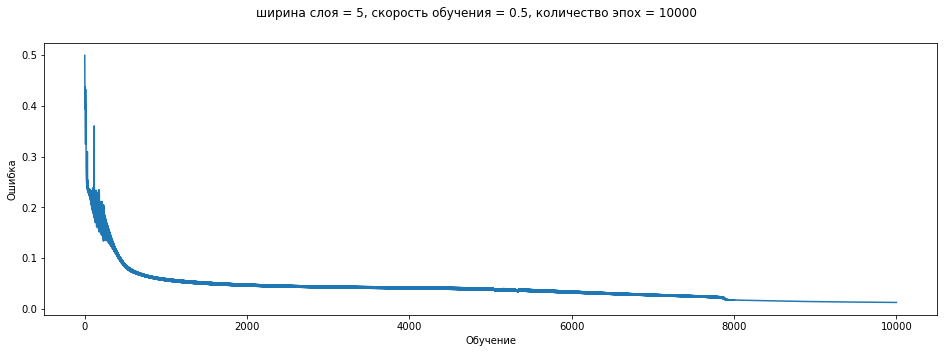

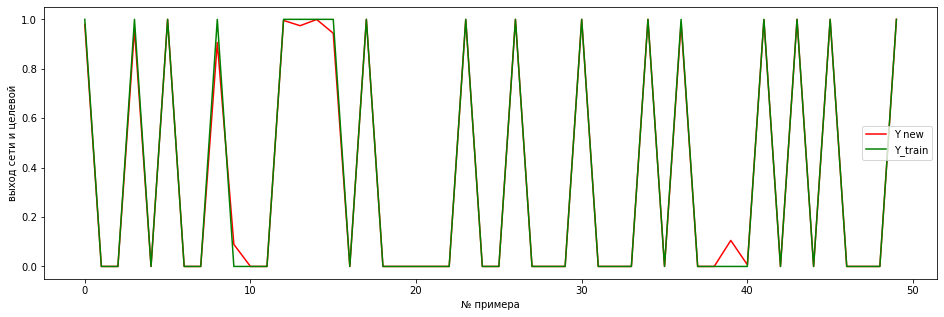

Аккуратность нейронной сети 98.73%


<Figure size 432x288 with 0 Axes>

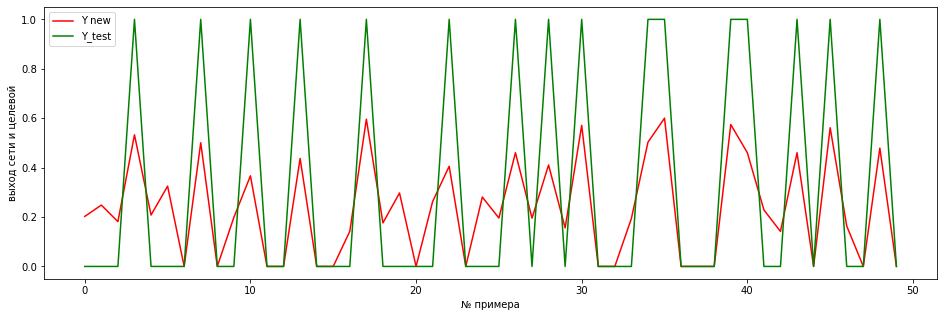

Аккуратность нейронной сети на тесте 78.13%

Набор параметров 21:
- ширина слоя = 10,
- скорость обучения = 0.5,
- количество эпох = 100


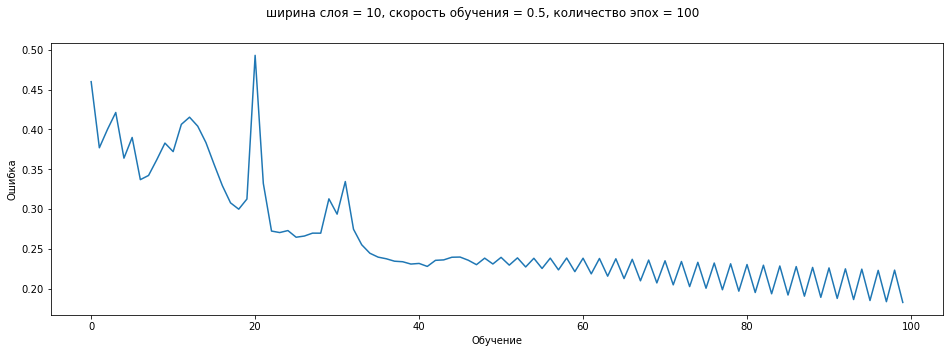

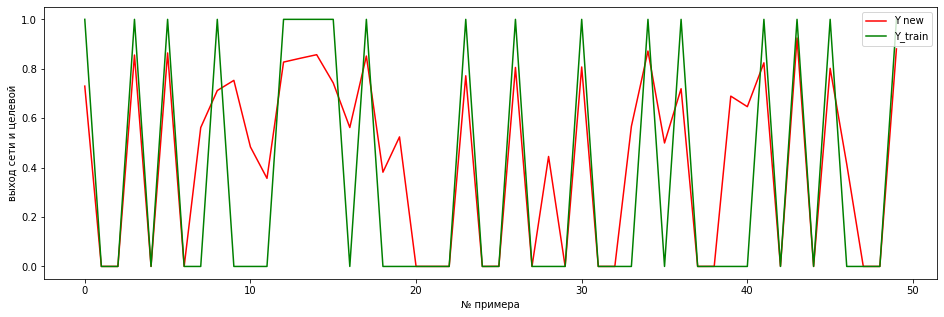

Аккуратность нейронной сети 81.68%


<Figure size 432x288 with 0 Axes>

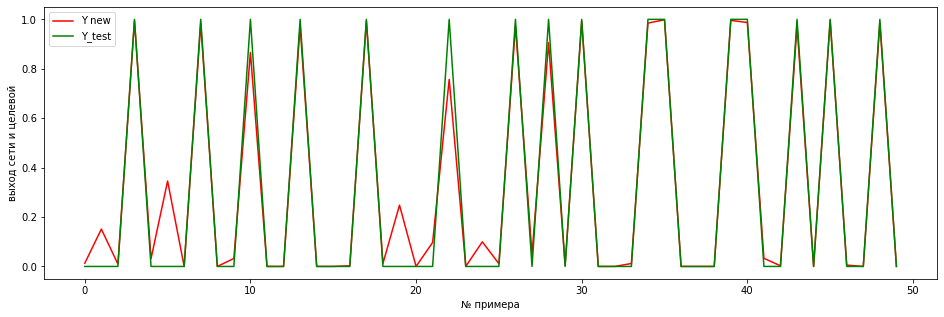

Аккуратность нейронной сети на тесте 97.06%

Набор параметров 22:
- ширина слоя = 10,
- скорость обучения = 0.5,
- количество эпох = 1000


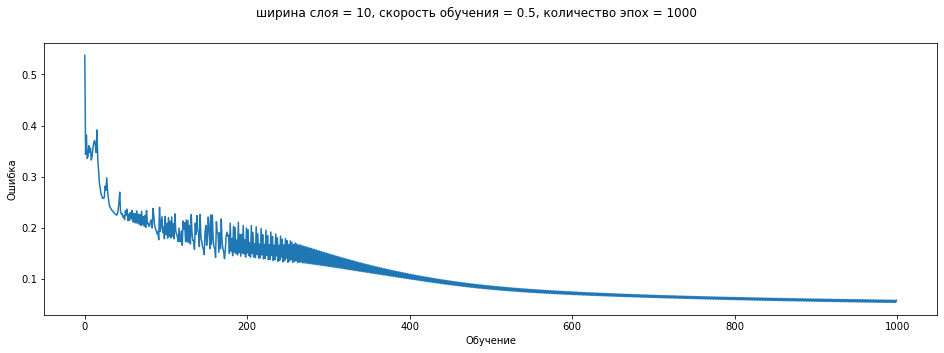

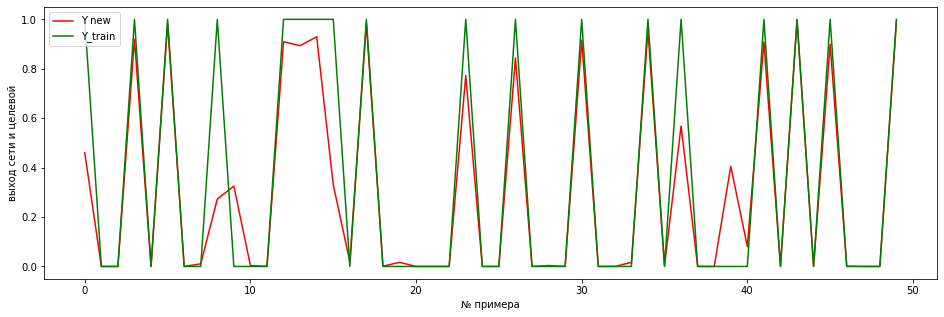

Аккуратность нейронной сети 94.19%


<Figure size 432x288 with 0 Axes>

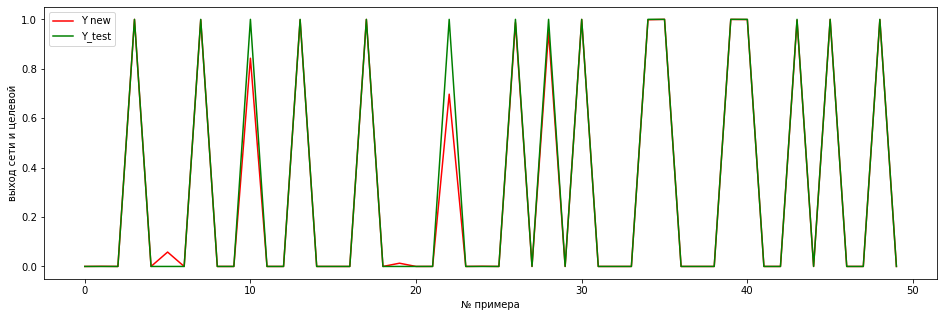

Аккуратность нейронной сети на тесте 98.93%

Набор параметров 23:
- ширина слоя = 10,
- скорость обучения = 0.5,
- количество эпох = 10000


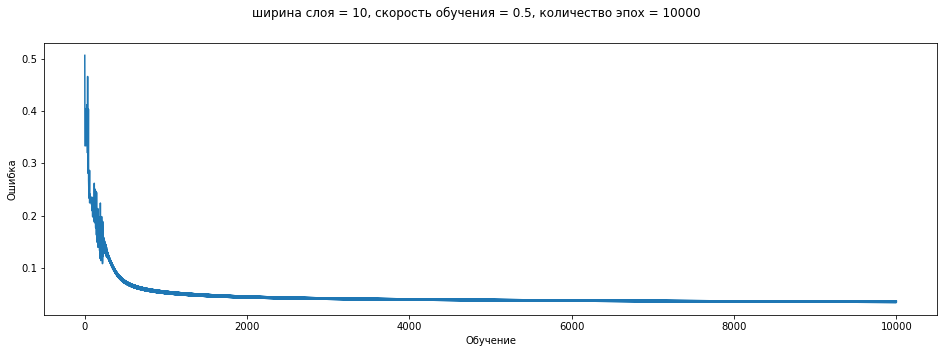

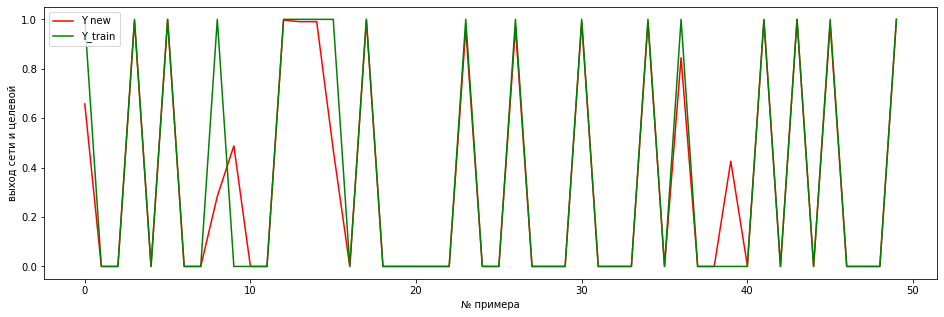

Аккуратность нейронной сети 96.42%


<Figure size 432x288 with 0 Axes>

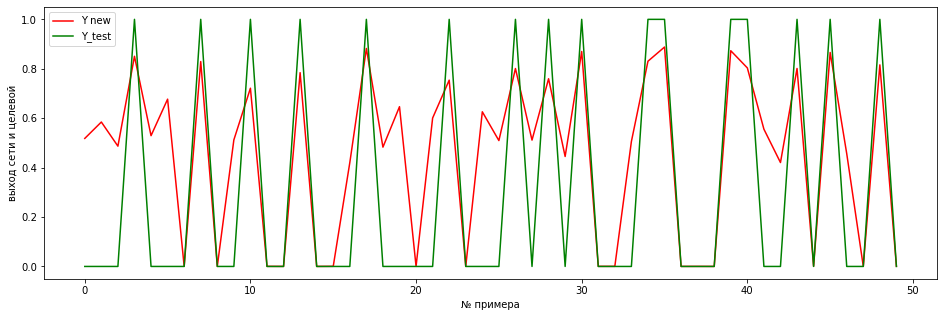

Аккуратность нейронной сети на тесте 80.17%

Набор параметров 24:
- ширина слоя = 15,
- скорость обучения = 0.5,
- количество эпох = 100


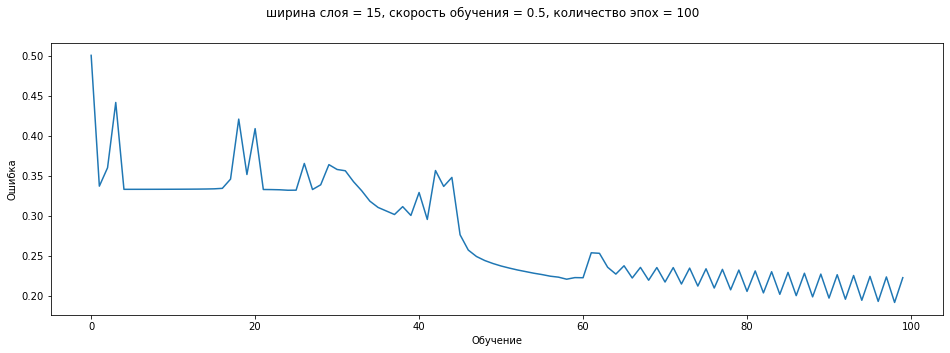

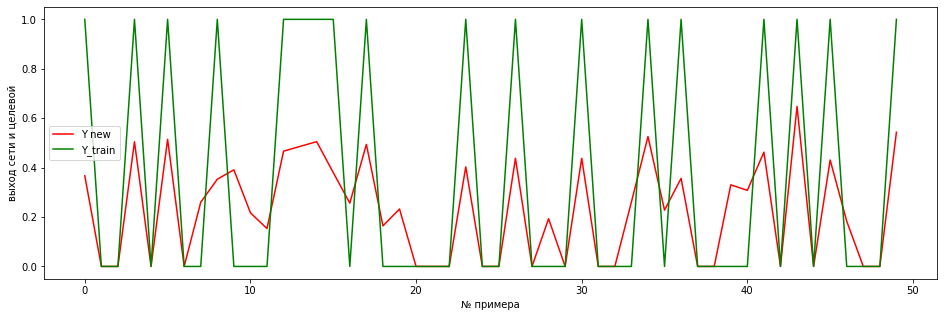

Аккуратность нейронной сети 77.7%


<Figure size 432x288 with 0 Axes>

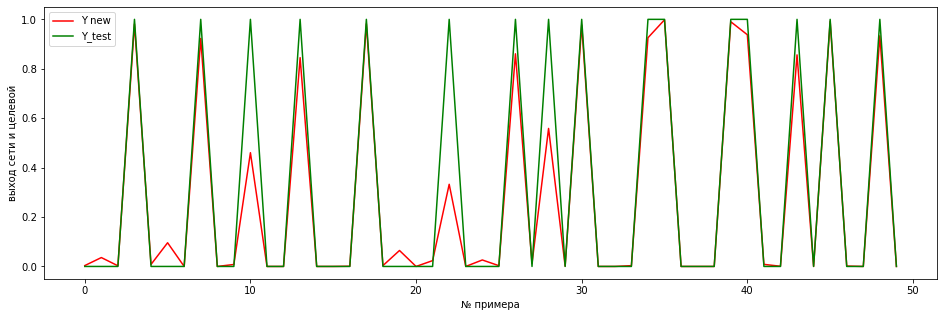

Аккуратность нейронной сети на тесте 95.73%

Набор параметров 25:
- ширина слоя = 15,
- скорость обучения = 0.5,
- количество эпох = 1000


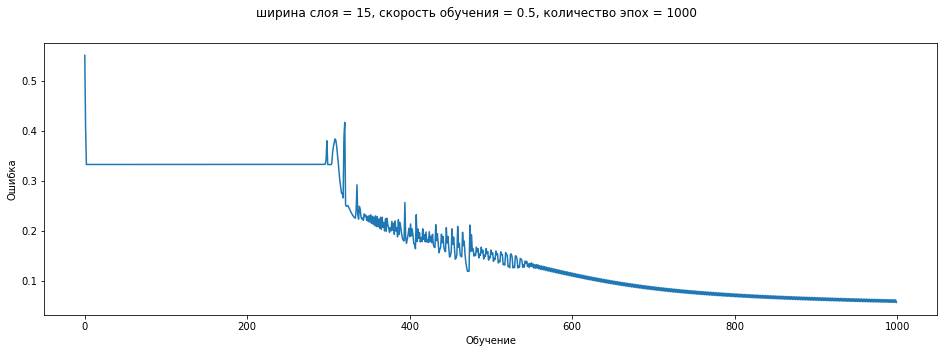

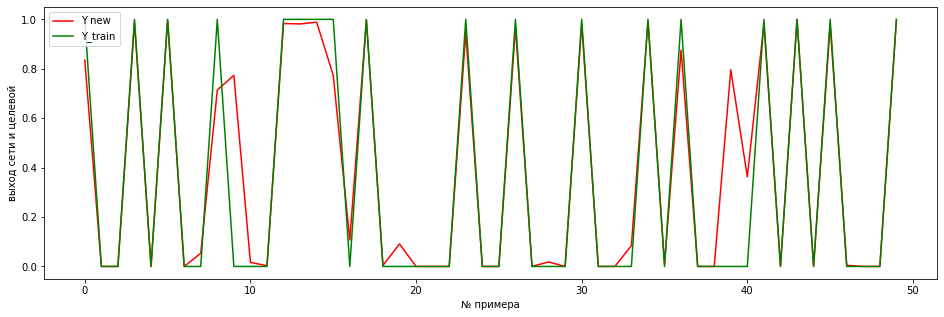

Аккуратность нейронной сети 94.3%


<Figure size 432x288 with 0 Axes>

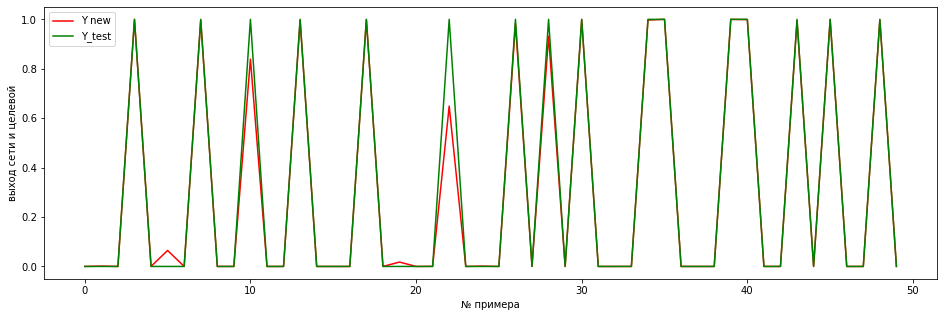

Аккуратность нейронной сети на тесте 98.89%

Набор параметров 26:
- ширина слоя = 15,
- скорость обучения = 0.5,
- количество эпох = 10000


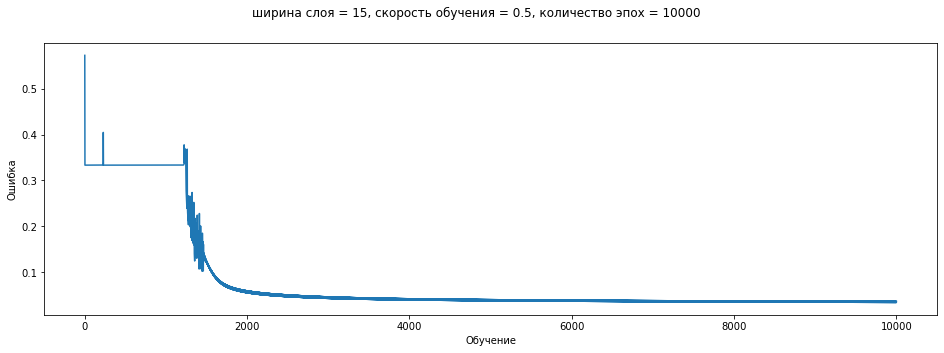

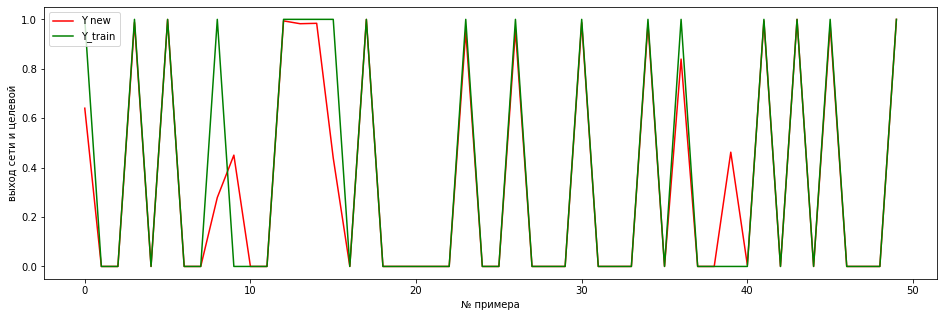

Аккуратность нейронной сети 96.32%


<Figure size 432x288 with 0 Axes>

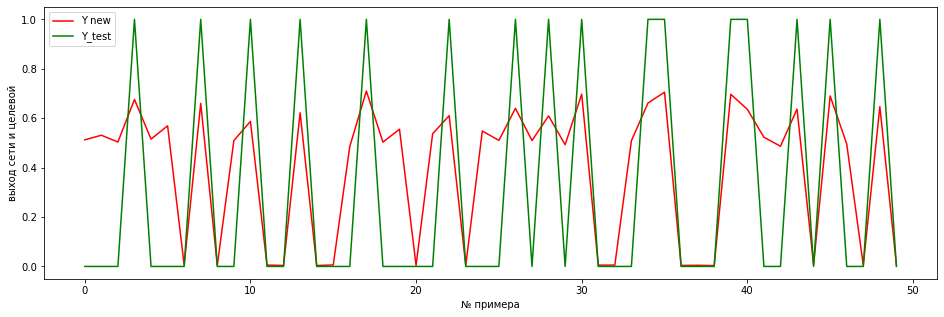

Аккуратность нейронной сети на тесте 76.73%

Набор параметров 27:
- ширина слоя = 5,
- скорость обучения = 1.0,
- количество эпох = 100


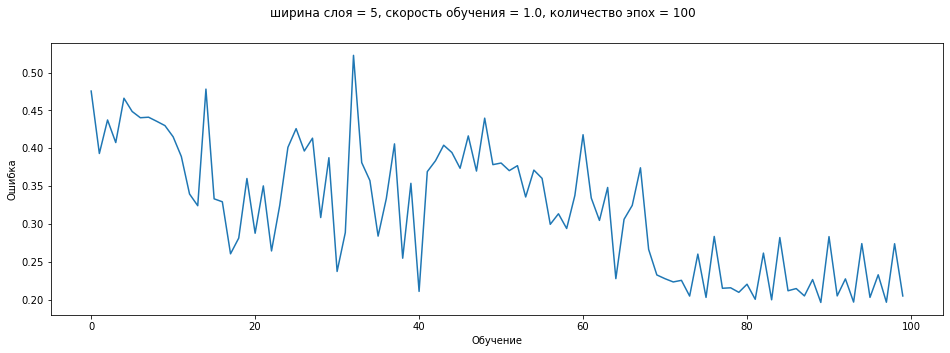

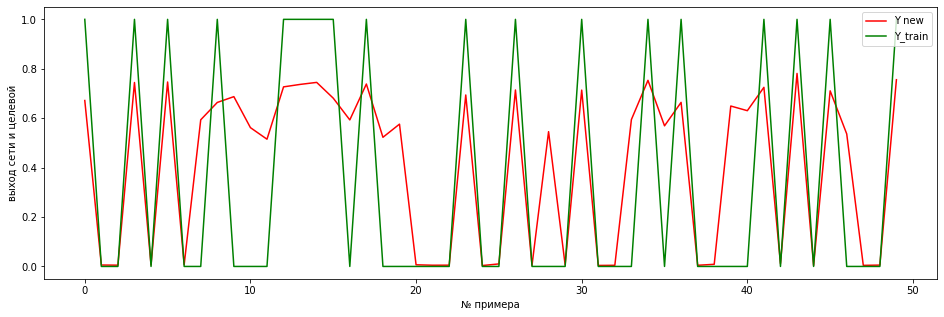

Аккуратность нейронной сети 79.53%


<Figure size 432x288 with 0 Axes>

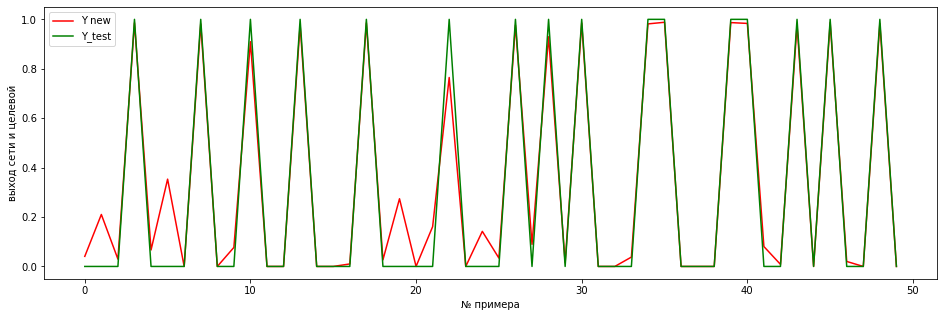

Аккуратность нейронной сети на тесте 96.77%

Набор параметров 28:
- ширина слоя = 5,
- скорость обучения = 1.0,
- количество эпох = 1000


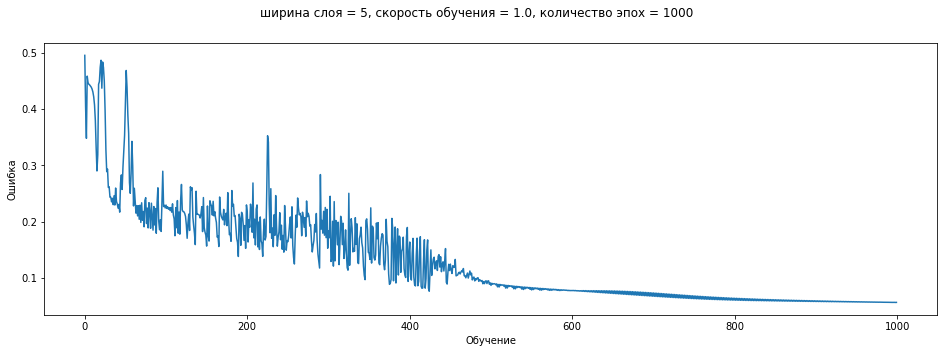

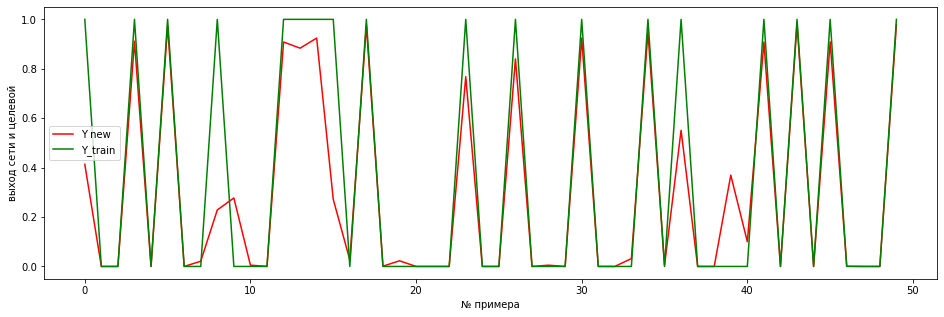

Аккуратность нейронной сети 94.3%


<Figure size 432x288 with 0 Axes>

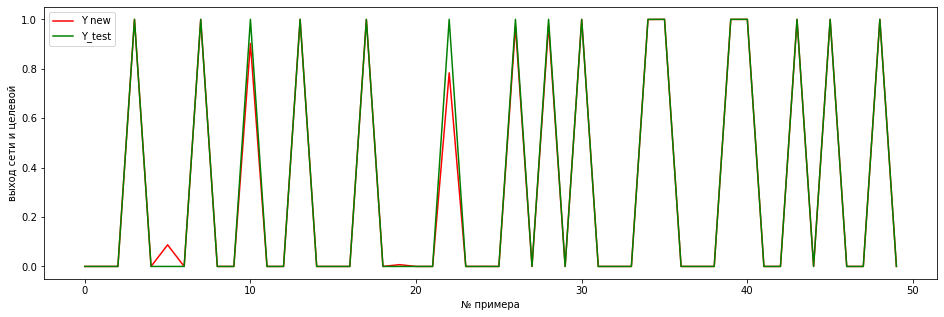

Аккуратность нейронной сети на тесте 99.17%

Набор параметров 29:
- ширина слоя = 5,
- скорость обучения = 1.0,
- количество эпох = 10000


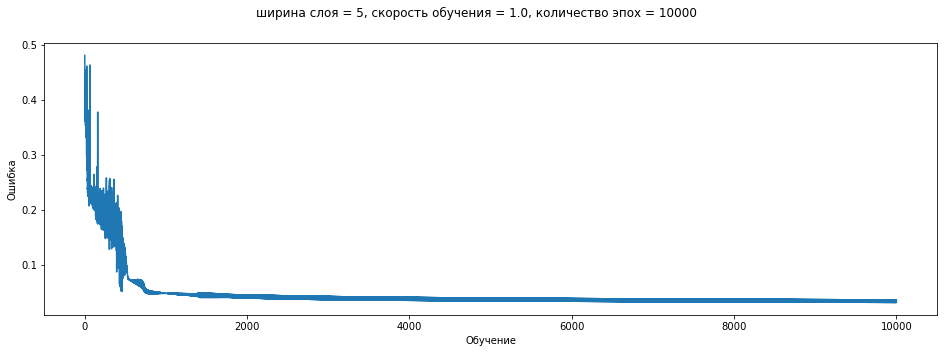

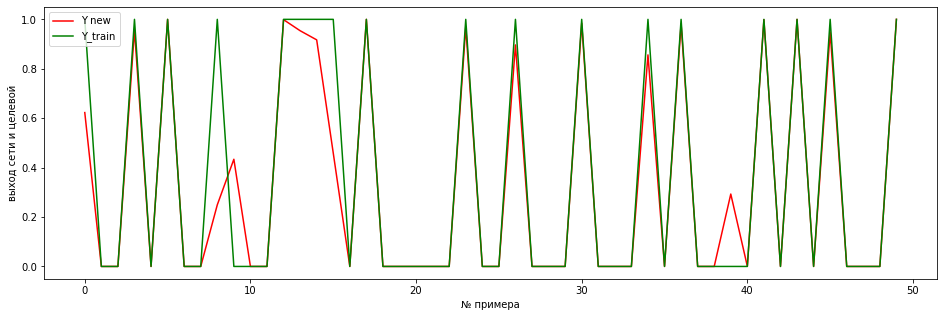

Аккуратность нейронной сети 96.28%


<Figure size 432x288 with 0 Axes>

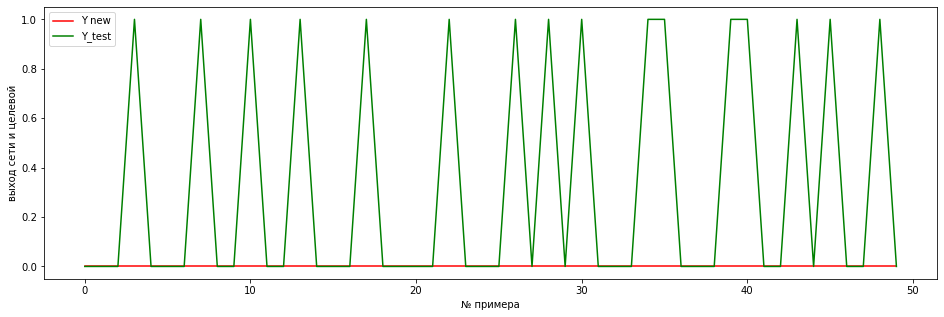

Аккуратность нейронной сети на тесте 66.67%

Набор параметров 30:
- ширина слоя = 10,
- скорость обучения = 1.0,
- количество эпох = 100


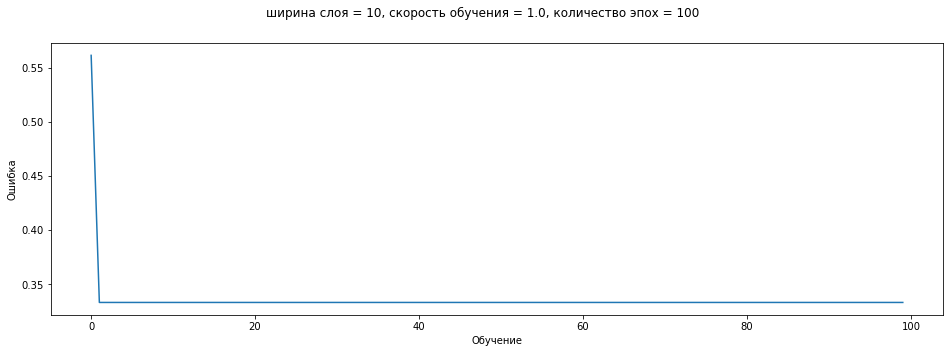

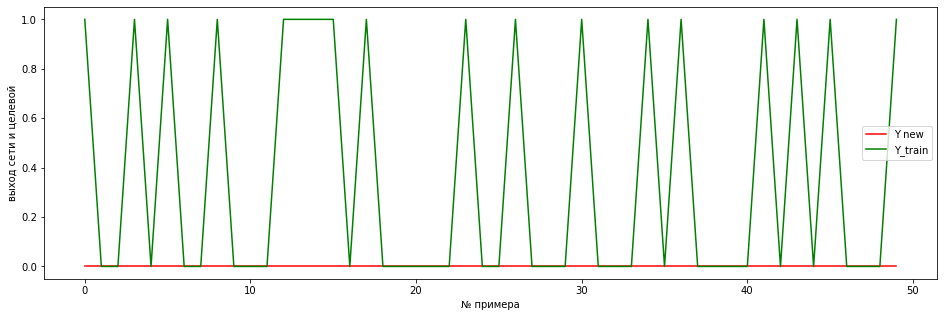

Аккуратность нейронной сети 66.67%


<Figure size 432x288 with 0 Axes>

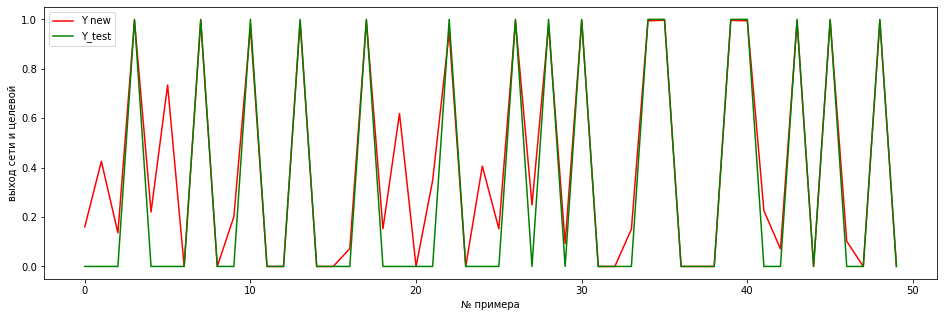

Аккуратность нейронной сети на тесте 93.95%

Набор параметров 31:
- ширина слоя = 10,
- скорость обучения = 1.0,
- количество эпох = 1000


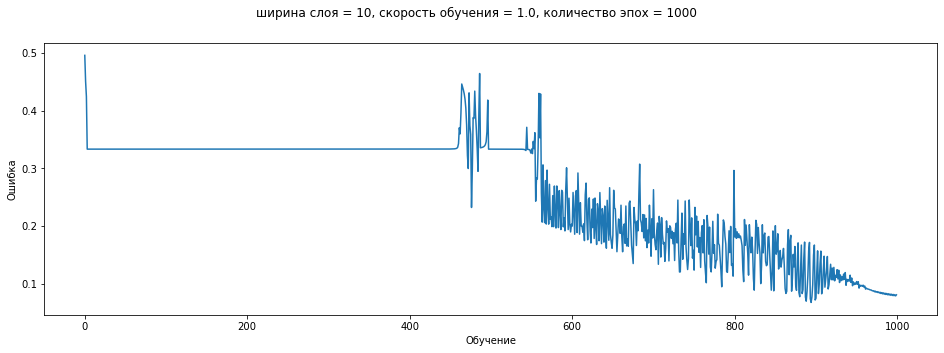

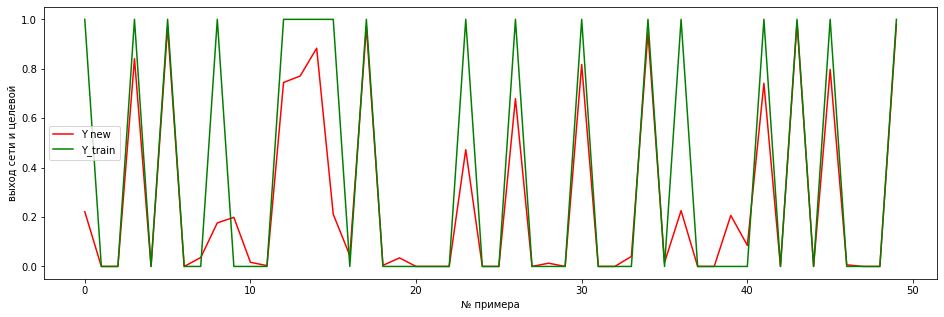

Аккуратность нейронной сети 91.96%


<Figure size 432x288 with 0 Axes>

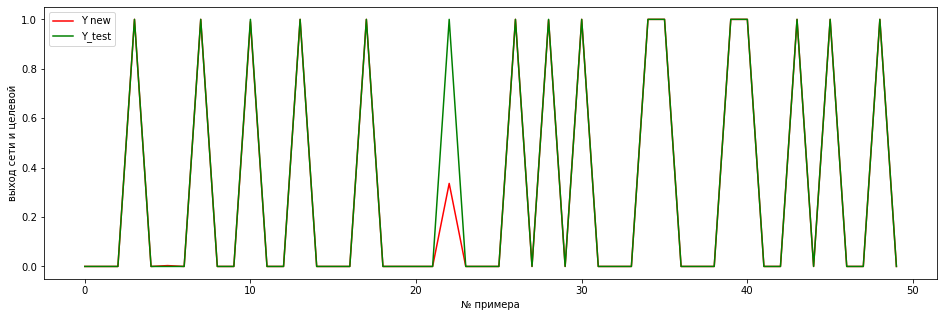

Аккуратность нейронной сети на тесте 99.05%

Набор параметров 32:
- ширина слоя = 10,
- скорость обучения = 1.0,
- количество эпох = 10000


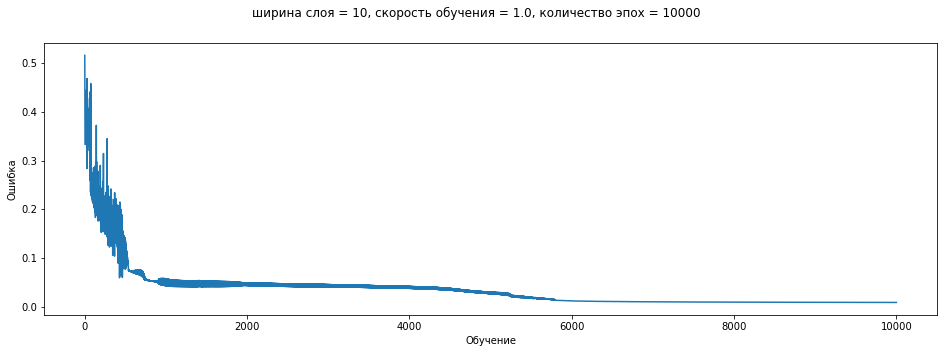

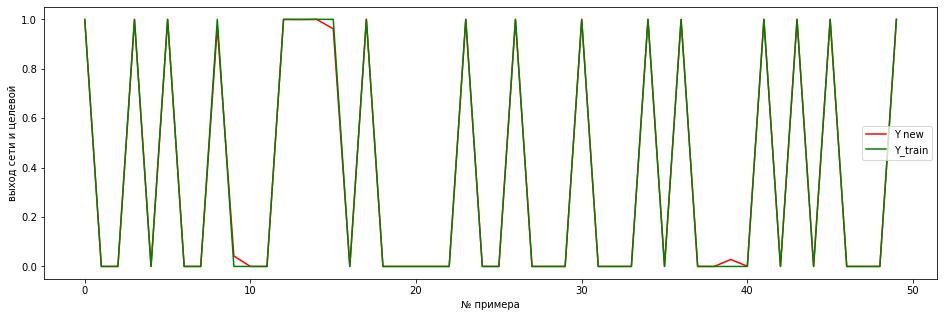

Аккуратность нейронной сети 99.16%


<Figure size 432x288 with 0 Axes>

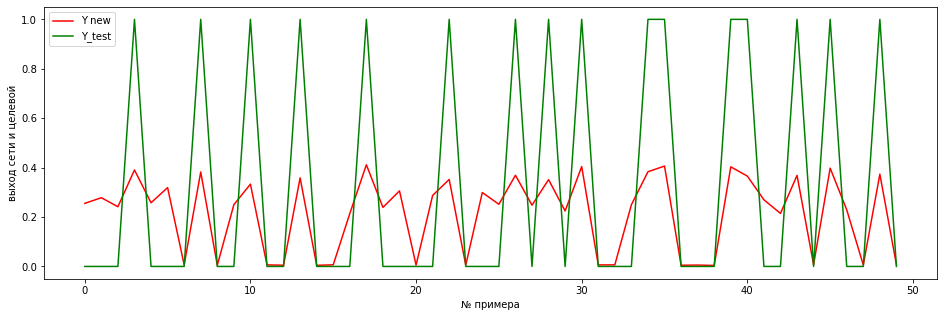

Аккуратность нейронной сети на тесте 75.02%

Набор параметров 33:
- ширина слоя = 15,
- скорость обучения = 1.0,
- количество эпох = 100


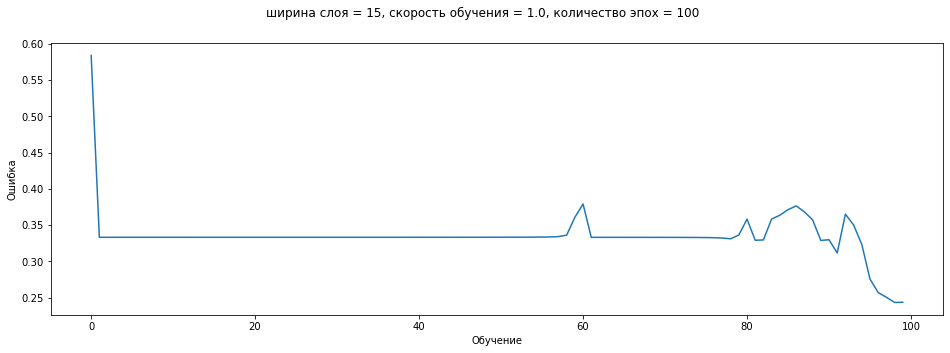

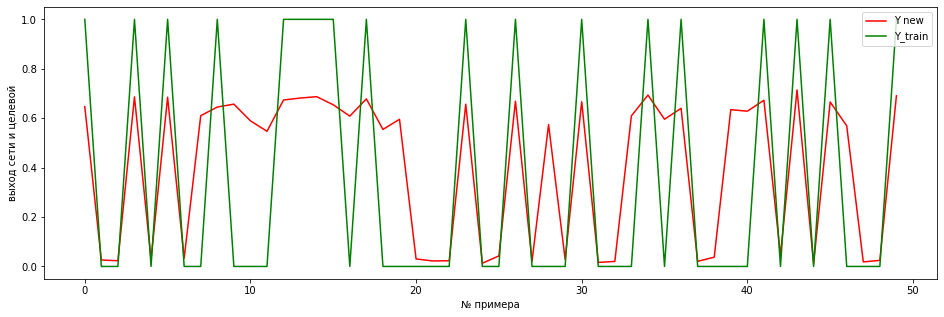

Аккуратность нейронной сети 75.63%


<Figure size 432x288 with 0 Axes>

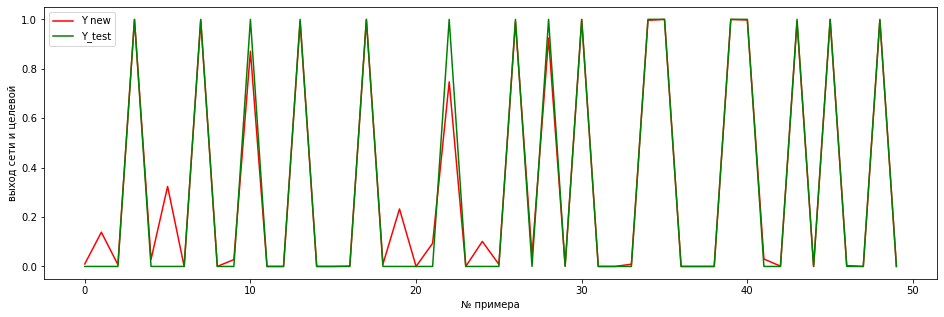

Аккуратность нейронной сети на тесте 97.41%

Набор параметров 34:
- ширина слоя = 15,
- скорость обучения = 1.0,
- количество эпох = 1000


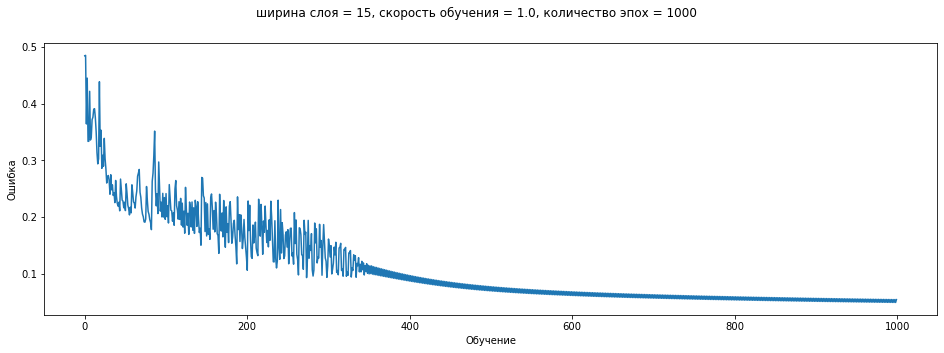

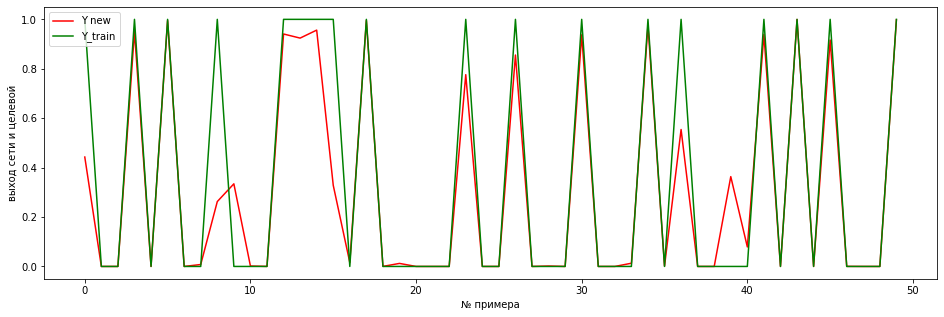

Аккуратность нейронной сети 94.55%


<Figure size 432x288 with 0 Axes>

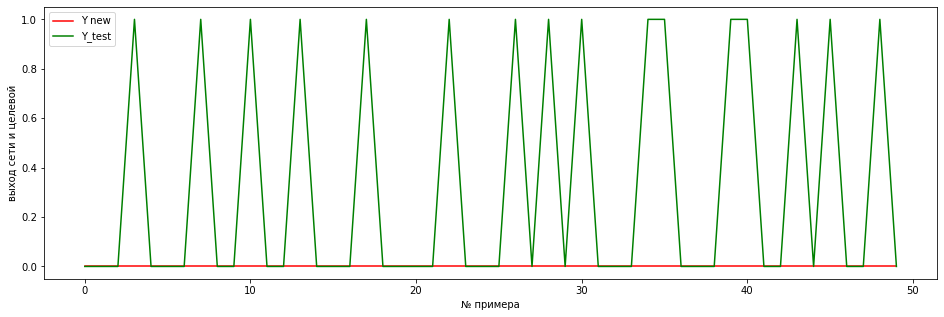

Аккуратность нейронной сети на тесте 66.67%

Набор параметров 35:
- ширина слоя = 15,
- скорость обучения = 1.0,
- количество эпох = 10000


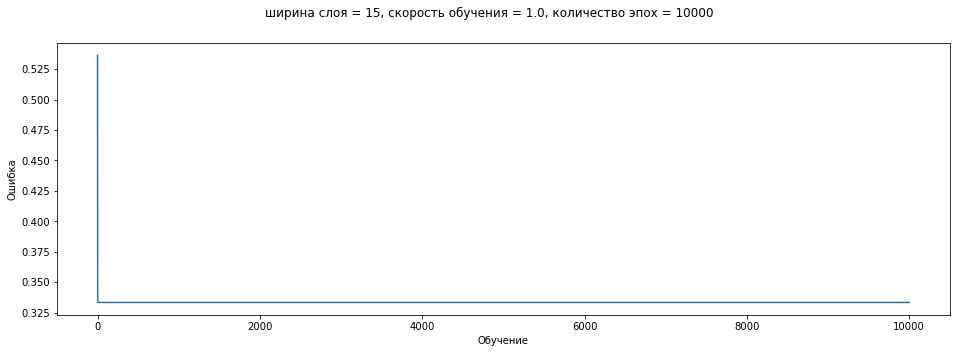

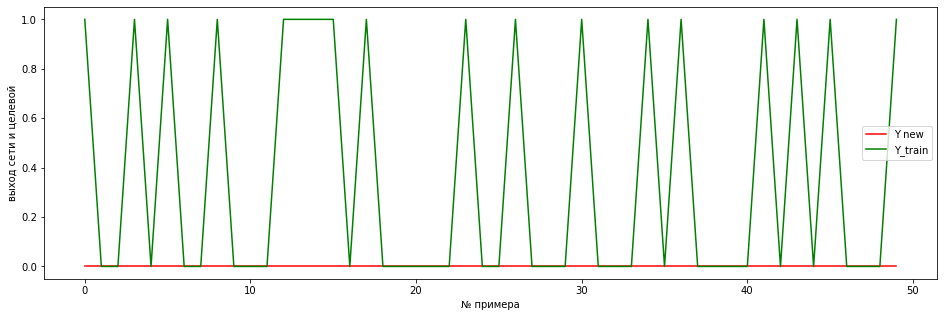

Аккуратность нейронной сети 66.67%


<Figure size 432x288 with 0 Axes>

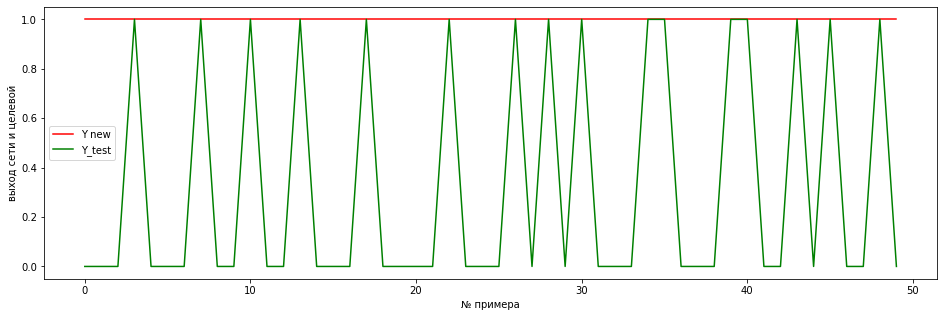

Аккуратность нейронной сети на тесте 54.67%

Набор параметров 36:
- ширина слоя = 5,
- скорость обучения = 5.0,
- количество эпох = 100


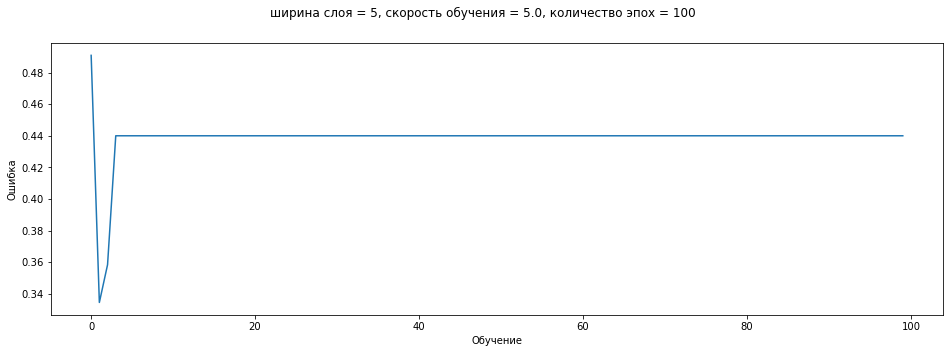

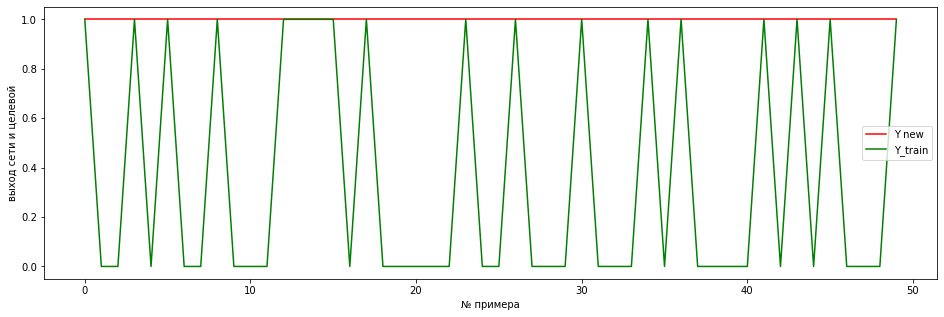

Аккуратность нейронной сети 56.0%


<Figure size 432x288 with 0 Axes>

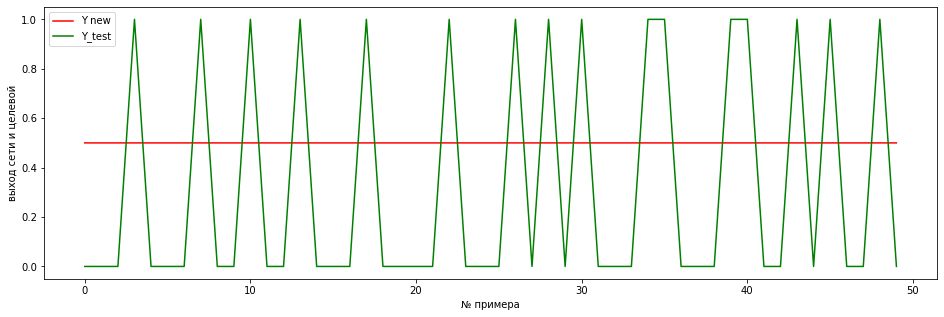

Аккуратность нейронной сети на тесте 50.0%

Набор параметров 37:
- ширина слоя = 5,
- скорость обучения = 5.0,
- количество эпох = 1000


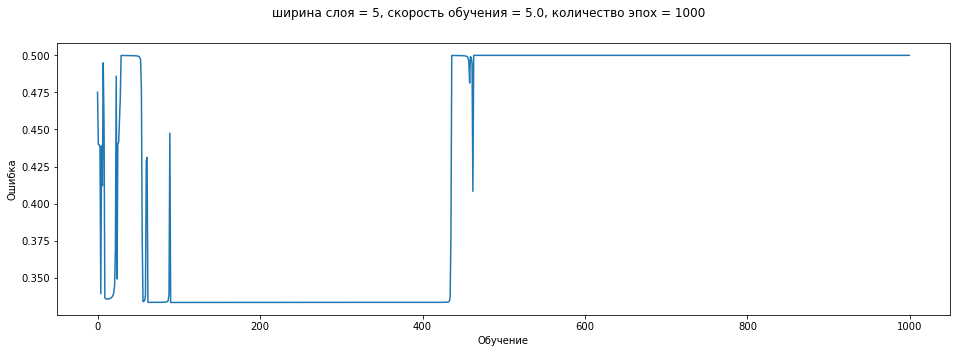

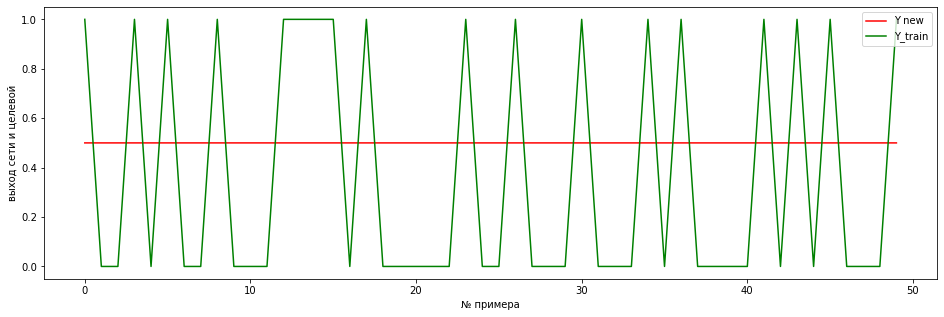

Аккуратность нейронной сети 50.0%


<Figure size 432x288 with 0 Axes>

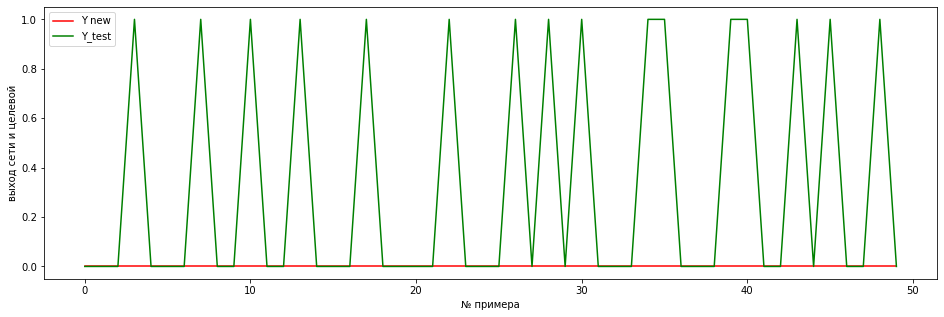

Аккуратность нейронной сети на тесте 66.67%

Набор параметров 38:
- ширина слоя = 5,
- скорость обучения = 5.0,
- количество эпох = 10000


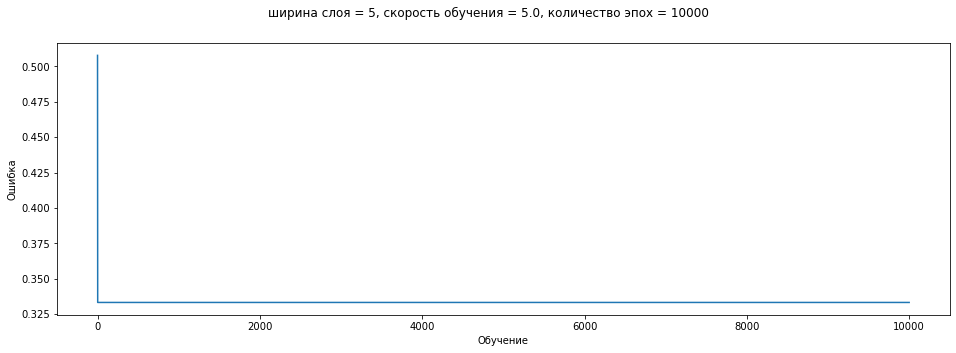

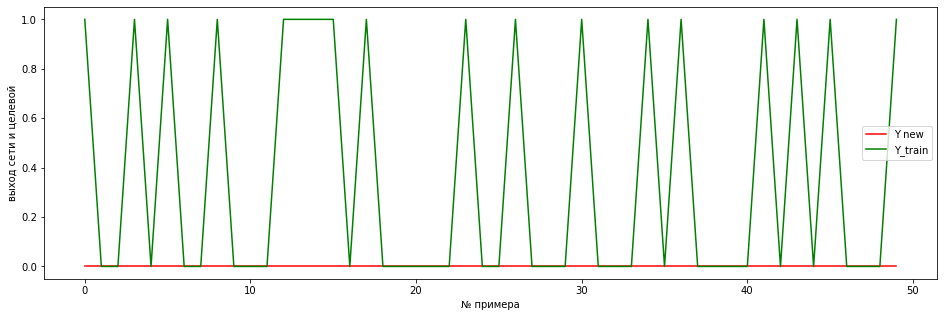

Аккуратность нейронной сети 66.67%


<Figure size 432x288 with 0 Axes>

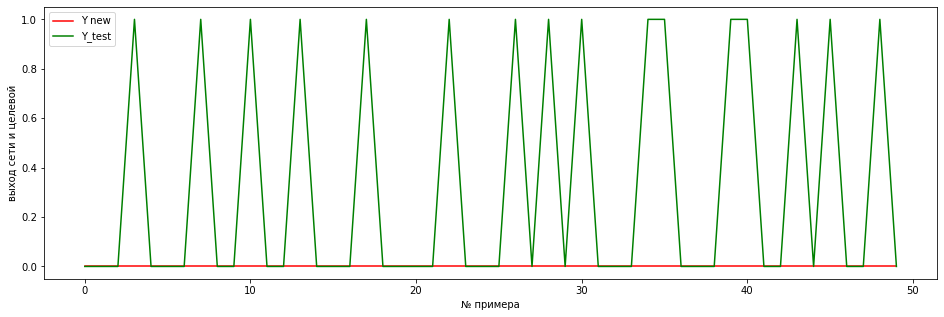

Аккуратность нейронной сети на тесте 66.67%

Набор параметров 39:
- ширина слоя = 10,
- скорость обучения = 5.0,
- количество эпох = 100


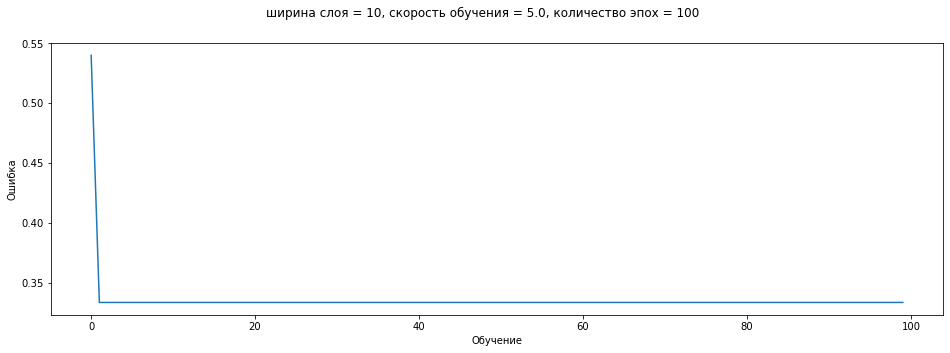

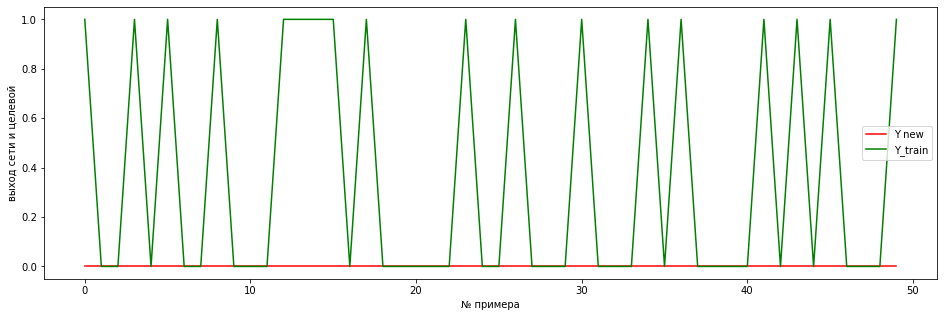

Аккуратность нейронной сети 66.67%


<Figure size 432x288 with 0 Axes>

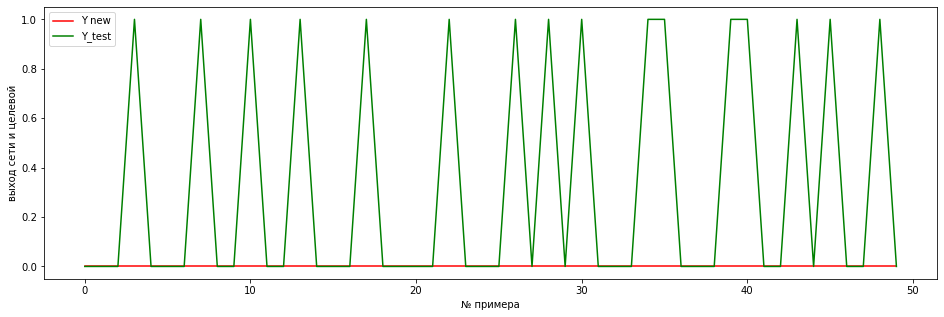

Аккуратность нейронной сети на тесте 66.67%

Набор параметров 40:
- ширина слоя = 10,
- скорость обучения = 5.0,
- количество эпох = 1000


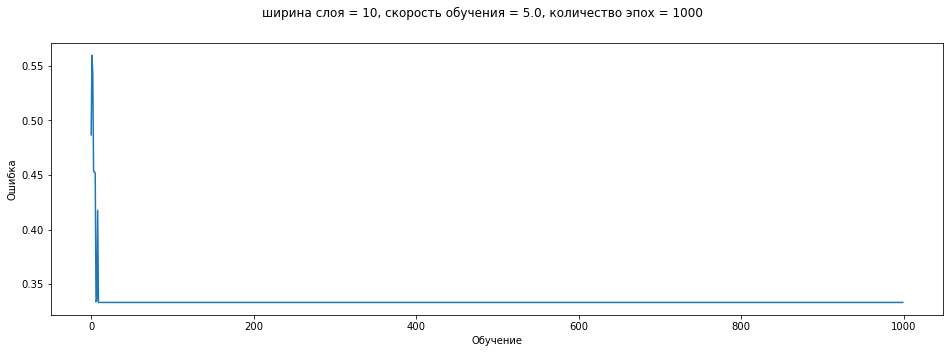

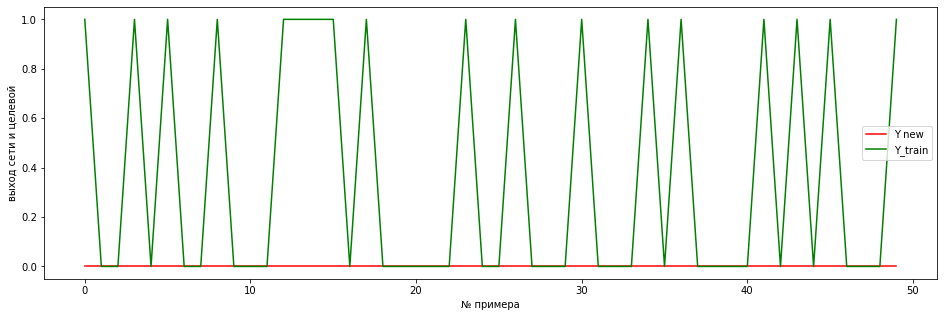

Аккуратность нейронной сети 66.67%


<Figure size 432x288 with 0 Axes>

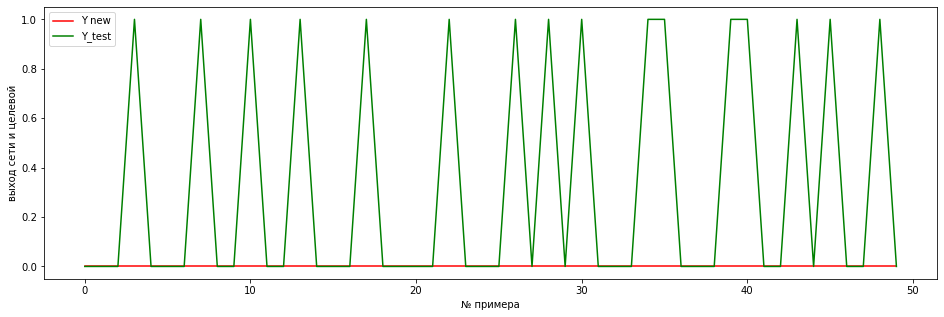

Аккуратность нейронной сети на тесте 66.67%

Набор параметров 41:
- ширина слоя = 10,
- скорость обучения = 5.0,
- количество эпох = 10000


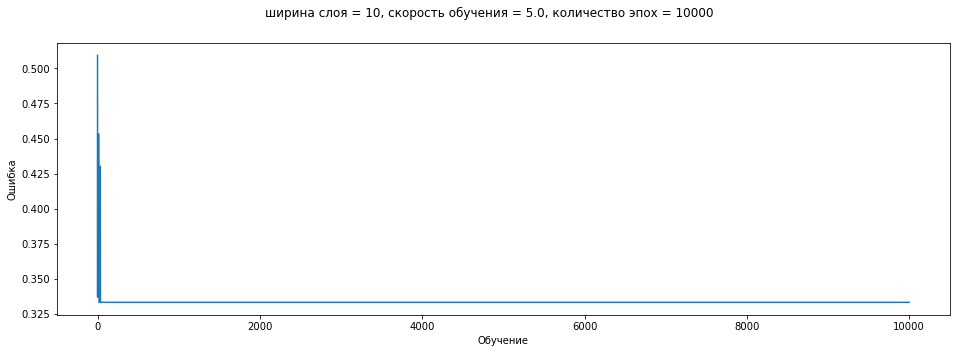

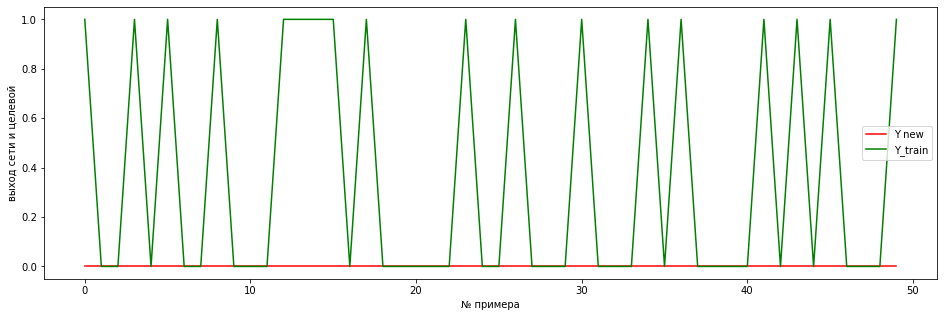

Аккуратность нейронной сети 66.67%


<Figure size 432x288 with 0 Axes>

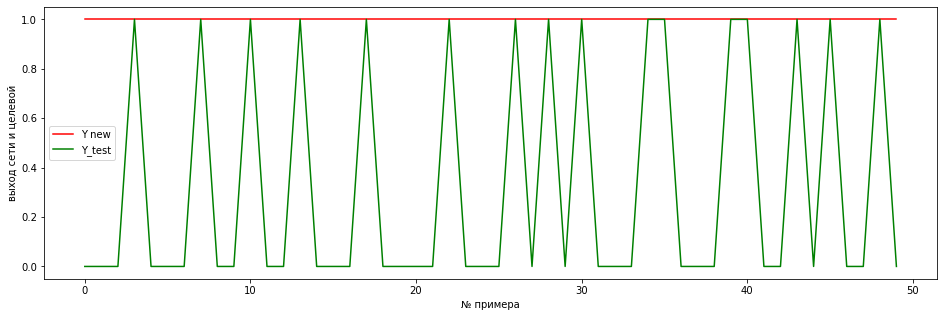

Аккуратность нейронной сети на тесте 54.67%

Набор параметров 42:
- ширина слоя = 15,
- скорость обучения = 5.0,
- количество эпох = 100


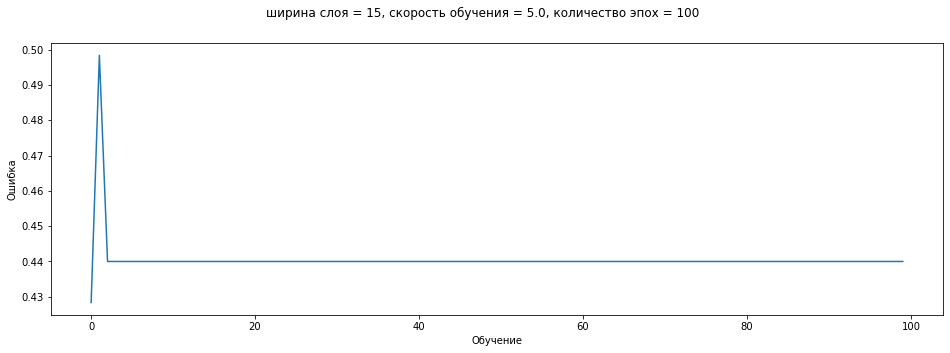

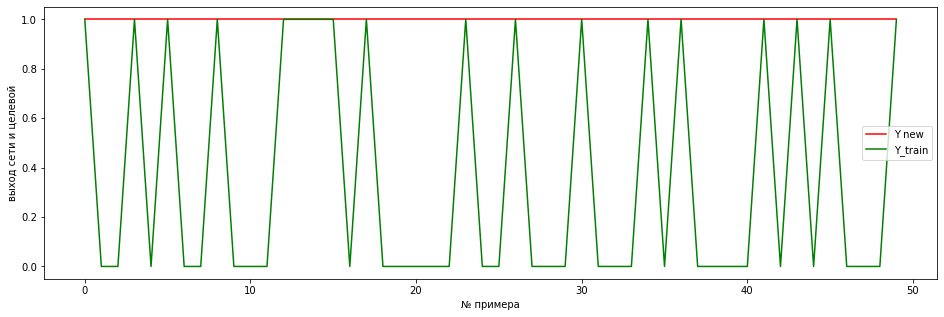

Аккуратность нейронной сети 56.0%


<Figure size 432x288 with 0 Axes>

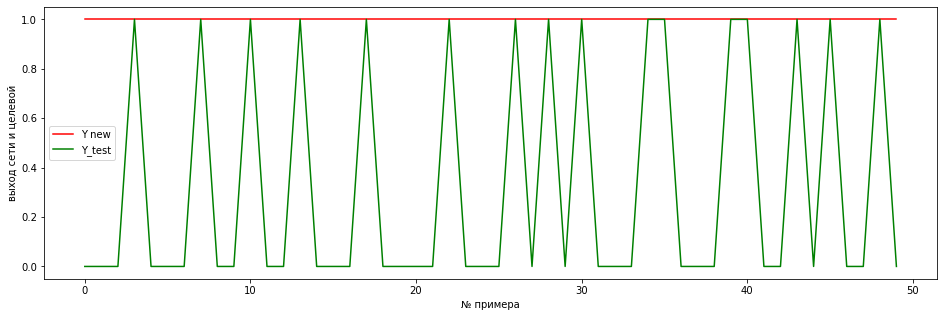

Аккуратность нейронной сети на тесте 54.67%

Набор параметров 43:
- ширина слоя = 15,
- скорость обучения = 5.0,
- количество эпох = 1000


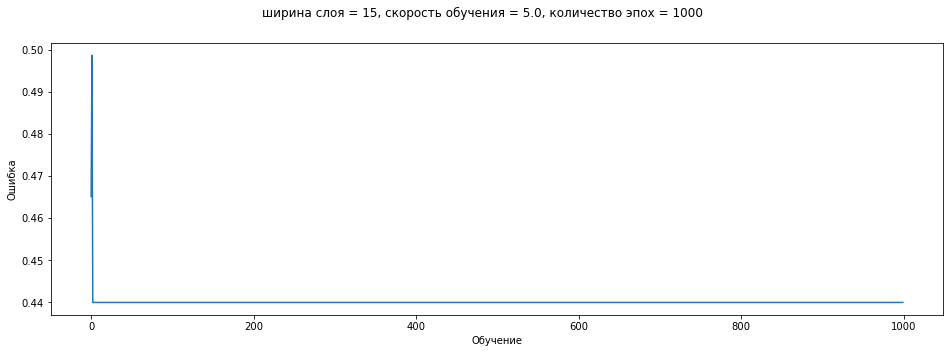

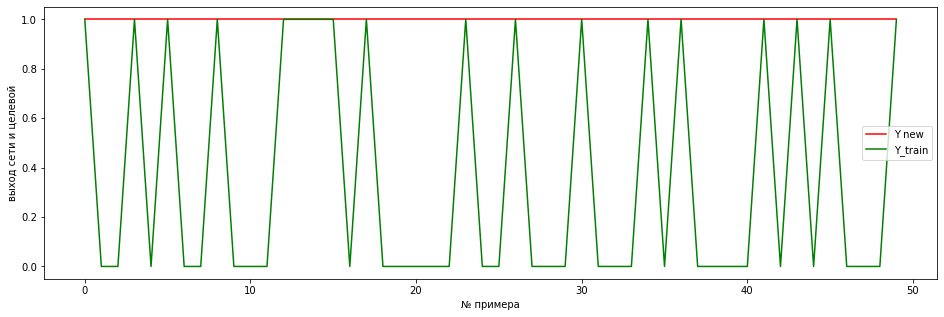

Аккуратность нейронной сети 56.0%


<Figure size 432x288 with 0 Axes>

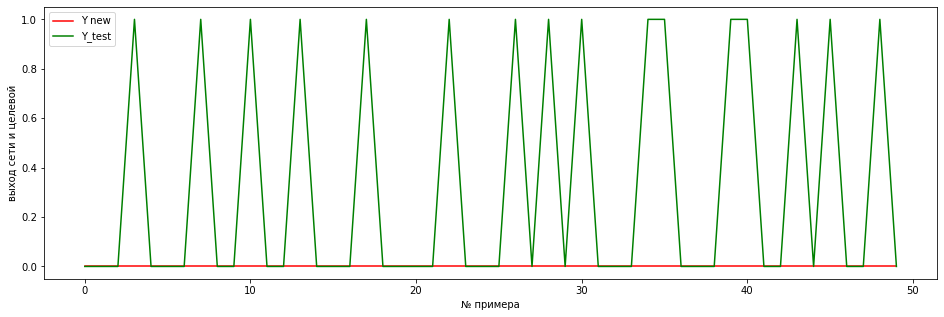

Аккуратность нейронной сети на тесте 66.67%

Набор параметров 44:
- ширина слоя = 15,
- скорость обучения = 5.0,
- количество эпох = 10000


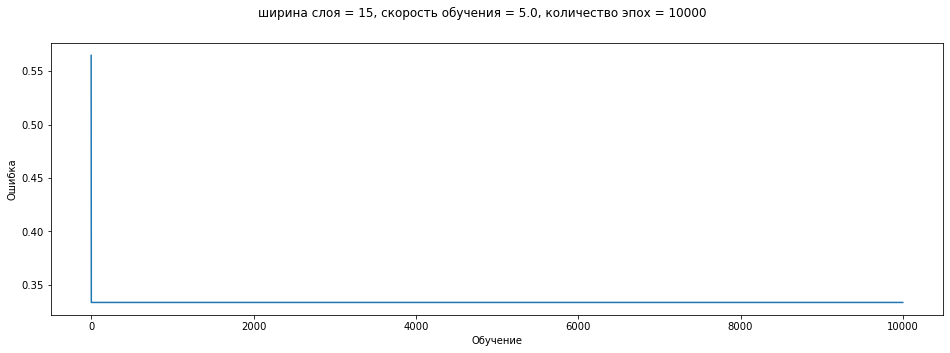

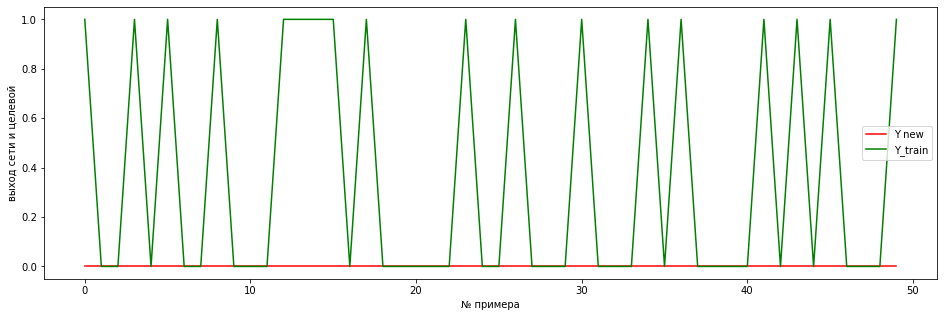

Аккуратность нейронной сети 66.67%


<Figure size 432x288 with 0 Axes>

In [61]:
import pandas as pd

# colNames = ["neuron_numb", "n", "epoch_numb", "accuracy"]
colNames = ["ширина слоя", "скорость обучения", "количество эпох", "train accuracy", "test accuracy_t"]

model_result = {}

s = 0
for j in n:
    for i in neuron_numb:        
        for k in epoch_numb:
            # обучаем нейронную сеть
#             errors, layer2, accuracy, w0, w1 = learning_nn(i, j, k)
            errors, layer2, accuracy, w0, w1 = fit_nn(i, j, k)
            accuracy_t = predict_nn(X_test, y_test, w0, w1)
            print(f'\nНабор параметров {s}:\n- ширина слоя = {i},\n- скорость обучения = {j},\n- количество эпох = {k}')
            model_result['Набор параметров ' + str(s)] = [i, j, k, round(accuracy, 2), round(accuracy_t, 2)]
            s += 1

            # чертим диаграмму точности в зависимости от обучения
            plot_errors(errors, i, j, k)
            plot_layer_y(layer2, accuracy, y_train, 'Y_train', i, j ,k)

In [44]:
# model_result

In [63]:
df = pd.DataFrame.from_dict(model_result, orient='index', columns=colNames)

df.sort_values(by='train accuracy',  ascending=False)

ширина слоя  скорость обучения  количество эпох  \
Набор параметров 32           10              1.000            10000   
Набор параметров 20            5              0.500            10000   
Набор параметров 23           10              0.500            10000   
Набор параметров 26           15              0.500            10000   
Набор параметров 29            5              1.000            10000   
Набор параметров 14           10              0.050            10000   
Набор параметров 17           15              0.050            10000   
Набор параметров 11            5              0.050            10000   
Набор параметров 34           15              1.000             1000   
Набор параметров 19            5              0.500             1000   
Набор параметров 25           15              0.500             1000   
Набор параметров 28            5              1.000             1000   
Набор параметров 22           10              0.500             1000   
Набор параметров 31           10              1.000             1000   
Набор параметров 16           15              0.050             1000   
Набор параметров 5            10              0.005            10000   
Набор параметров 8            15              0.005            10000   
Набор параметров 13           10              0.050             1000   
Набор параметров 2             5              0.005            10000   
Набор параметров 10            5              0.050             1000   
Набор параметров 21           10              0.500              100   
Набор параметров 27            5              1.000              100   
Набор параметров 24           15              0.500              100   
Набор параметров 18            5              0.500              100   
Набор параметров 33           15              1.000              100   
Набор параметров 15           15              0.050              100   
Набор параметров 4            10              0.005             1000   
Набор параметров 12           10              0.050              100   
Набор параметров 7            15              0.005             1000   
Набор параметров 9             5              0.050              100   
Набор параметров 1             5              0.005             1000   
Набор параметров 39           10              5.000              100   
Набор параметров 41           10              5.000            10000   
Набор параметров 40           10              5.000             1000   
Набор параметров 38            5              5.000            10000   
Набор параметров 44           15              5.000            10000   
Набор параметров 35           15              1.000            10000   
Набор параметров 30           10              1.000              100   
Набор параметров 6            15              0.005              100   
Набор параметров 3            10              0.005              100   
Набор параметров 36            5              5.000              100   
Набор параметров 42           15              5.000              100   
Набор параметров 43           15              5.000             1000   
Набор параметров 0             5              0.005              100   
Набор параметров 37            5              5.000             1000   

                     train accuracy  test accuracy_t  
Набор параметров 32           99.16            99.05  
Набор параметров 20           98.73            99.04  
Набор параметров 23           96.42            98.93  
Набор параметров 26           96.32            98.89  
Набор параметров 29           96.28            99.17  
Набор параметров 14           96.11            98.35  
Набор параметров 17           96.10            98.34  
Набор параметров 11           96.08            98.33  
Набор параметров 34           94.55            97.41  
Набор параметров 19           94.33            97.18  
Набор параметров 25           94.30            95.73  
Набор параметров 28           94.30            9

# 
# Домашнее задание

### _1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев)._

<br><br>
__Вывод:__

Значение полученное на вебинаре:
- __Аккуратность нейронной сети на тесте = 96.4%__ 
- __Аккуратность нейронной сети на тесте = 96.35%__

Лучшие значения accuracy, на тренировочной и тестовой, выборках показали:
- __Набор параметров 32__:	
    - ширина слоя=10, 
    - скорость обучения=1.0,
    - количество эпох=10000,
    - __train accuracy__=99.16,
    - __test accuracy_t__=99.05
- __Набор параметров 20__:
    - ширина слоя=5,
    - скорость обучения=0.5,
    - количество эпох=10000,
    - __train accuracy__=98.73,
    - __test accuracy_t__=99.04

Значение __train accuracy__ и __test accuracy_t__ близки, значит __модель не переобучилась__.

Значения близкие к значениям полученным на вебинаре:
- Набор параметров 23:	ширина слоя=10, скорость обучения=0.5, количество эпох=10000, train accuracy=96.42, test accuracy_t=98.93
- Набор параметров 26:	ширина слоя=15, скорость обучения=0.5, количество эпох=10000, train accuracy=96.32, test accuracy_t=98.89
- Набор параметров 29:	ширина слоя=5, скорость обучения=1.0, количество эпох=10000, train accuracy=96.28, test accuracy_t=99.17
- Набор параметров 14:	ширина слоя=10, скорость обучения=0.05, количество эпох=10000, train accuracy=96.11, test accuracy_t=98.35
- Набор параметров 17:	ширина слоя=15, скорость обучения=0.05, количество эпох=10000, train accuracy=96.10, test accuracy_t=98.34
- Набор параметров 11:	ширина слоя=5, скорость обучения=0.05, количество эпох=10000, train accuracy=96.08, test accuracy_t=98.33

Значения на __train__ немного хуже чем значения полученным на вебинаре:
- Набор параметров 34:	ширина слоя=15, скорость обучения=1.0, количество эпох=1000, train accuracy=94.55, test accuracy_t=97.41
- Набор параметров 19:	ширина слоя=5, скорость обучения=0.5, количество эпох=1000, train accuracy=94.33, test accuracy_t=97.18
- Набор параметров 25:	ширина слоя=15, скорость обучения=0.5, количество эпох=1000, train accuracy=94.30, test accuracy_t=95.73
- Набор параметров 28:	ширина слоя=5, скорость обучения=1.0, количество эпох=1000, train accuracy=94.30, test accuracy_t=96.77
- Набор параметров 22:	ширина слоя=10, скорость обучения=0.5, количество эпох=1000, train accuracy=94.19, test accuracy_t=97.06

Значение __train accuracy__ и __test accuracy_t__ близки, значит __модель не переобучилась__.

На остальных наборах параметров модель явным образом __не дообучилась__.

### _2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?_

<br><br>
__Вывод:__

К ухудшению точности нейронной сети приводит:
- увеличение скорости обучения выше 1.0 и уменьшение ниже 0.05
- уменьшение количесва эпох меньше 1000
- уменьшение ширины слоя

К увеличению точности нейронной сети приводит:
- скорость обучения 1.0 или 0.5
- увеличение количесва эпох до 10000
- ширина скрытого слоя влияет на результат, но с меньшей силой чем __скорости обучения__ и __количесва эпох__.